### Details of Logistic Regression and Feature Exploration

In [154]:
import numpy as np                      # numerical computation
import pandas as pd                     # data wrangling
import matplotlib.pyplot as plt         # plotting package
# Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl                # additional plotting functionality
import seaborn as sns                   # a fancy plotting package
mpl.rcParams['figure.dpi'] = 400        # high res figures
df = pd.read_csv('intermediate_data/Chapter_1_cleaned_data.csv')

In [155]:
# feature list and response variable
features_response = df.columns.tolist()     # access the columns of the data frame and convert to a list

In [156]:
features_response[:5]                       # first five colunns

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [157]:
features_response[-5:]                      # last five columns

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [158]:
items_to_remove = ['ID', 'SEX',\
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
                   'EDUCATION_CAT',\
                   'graduate school', 'high school', 'none',\
                   'others', 'university']

In [159]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [160]:
corr = df[features_response].corr()  # correlation matrix of all columns with one another
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


In [161]:
corr.iloc[0:5, 0:5] # integer indexing, first five rows, first five columns

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<Axes: >

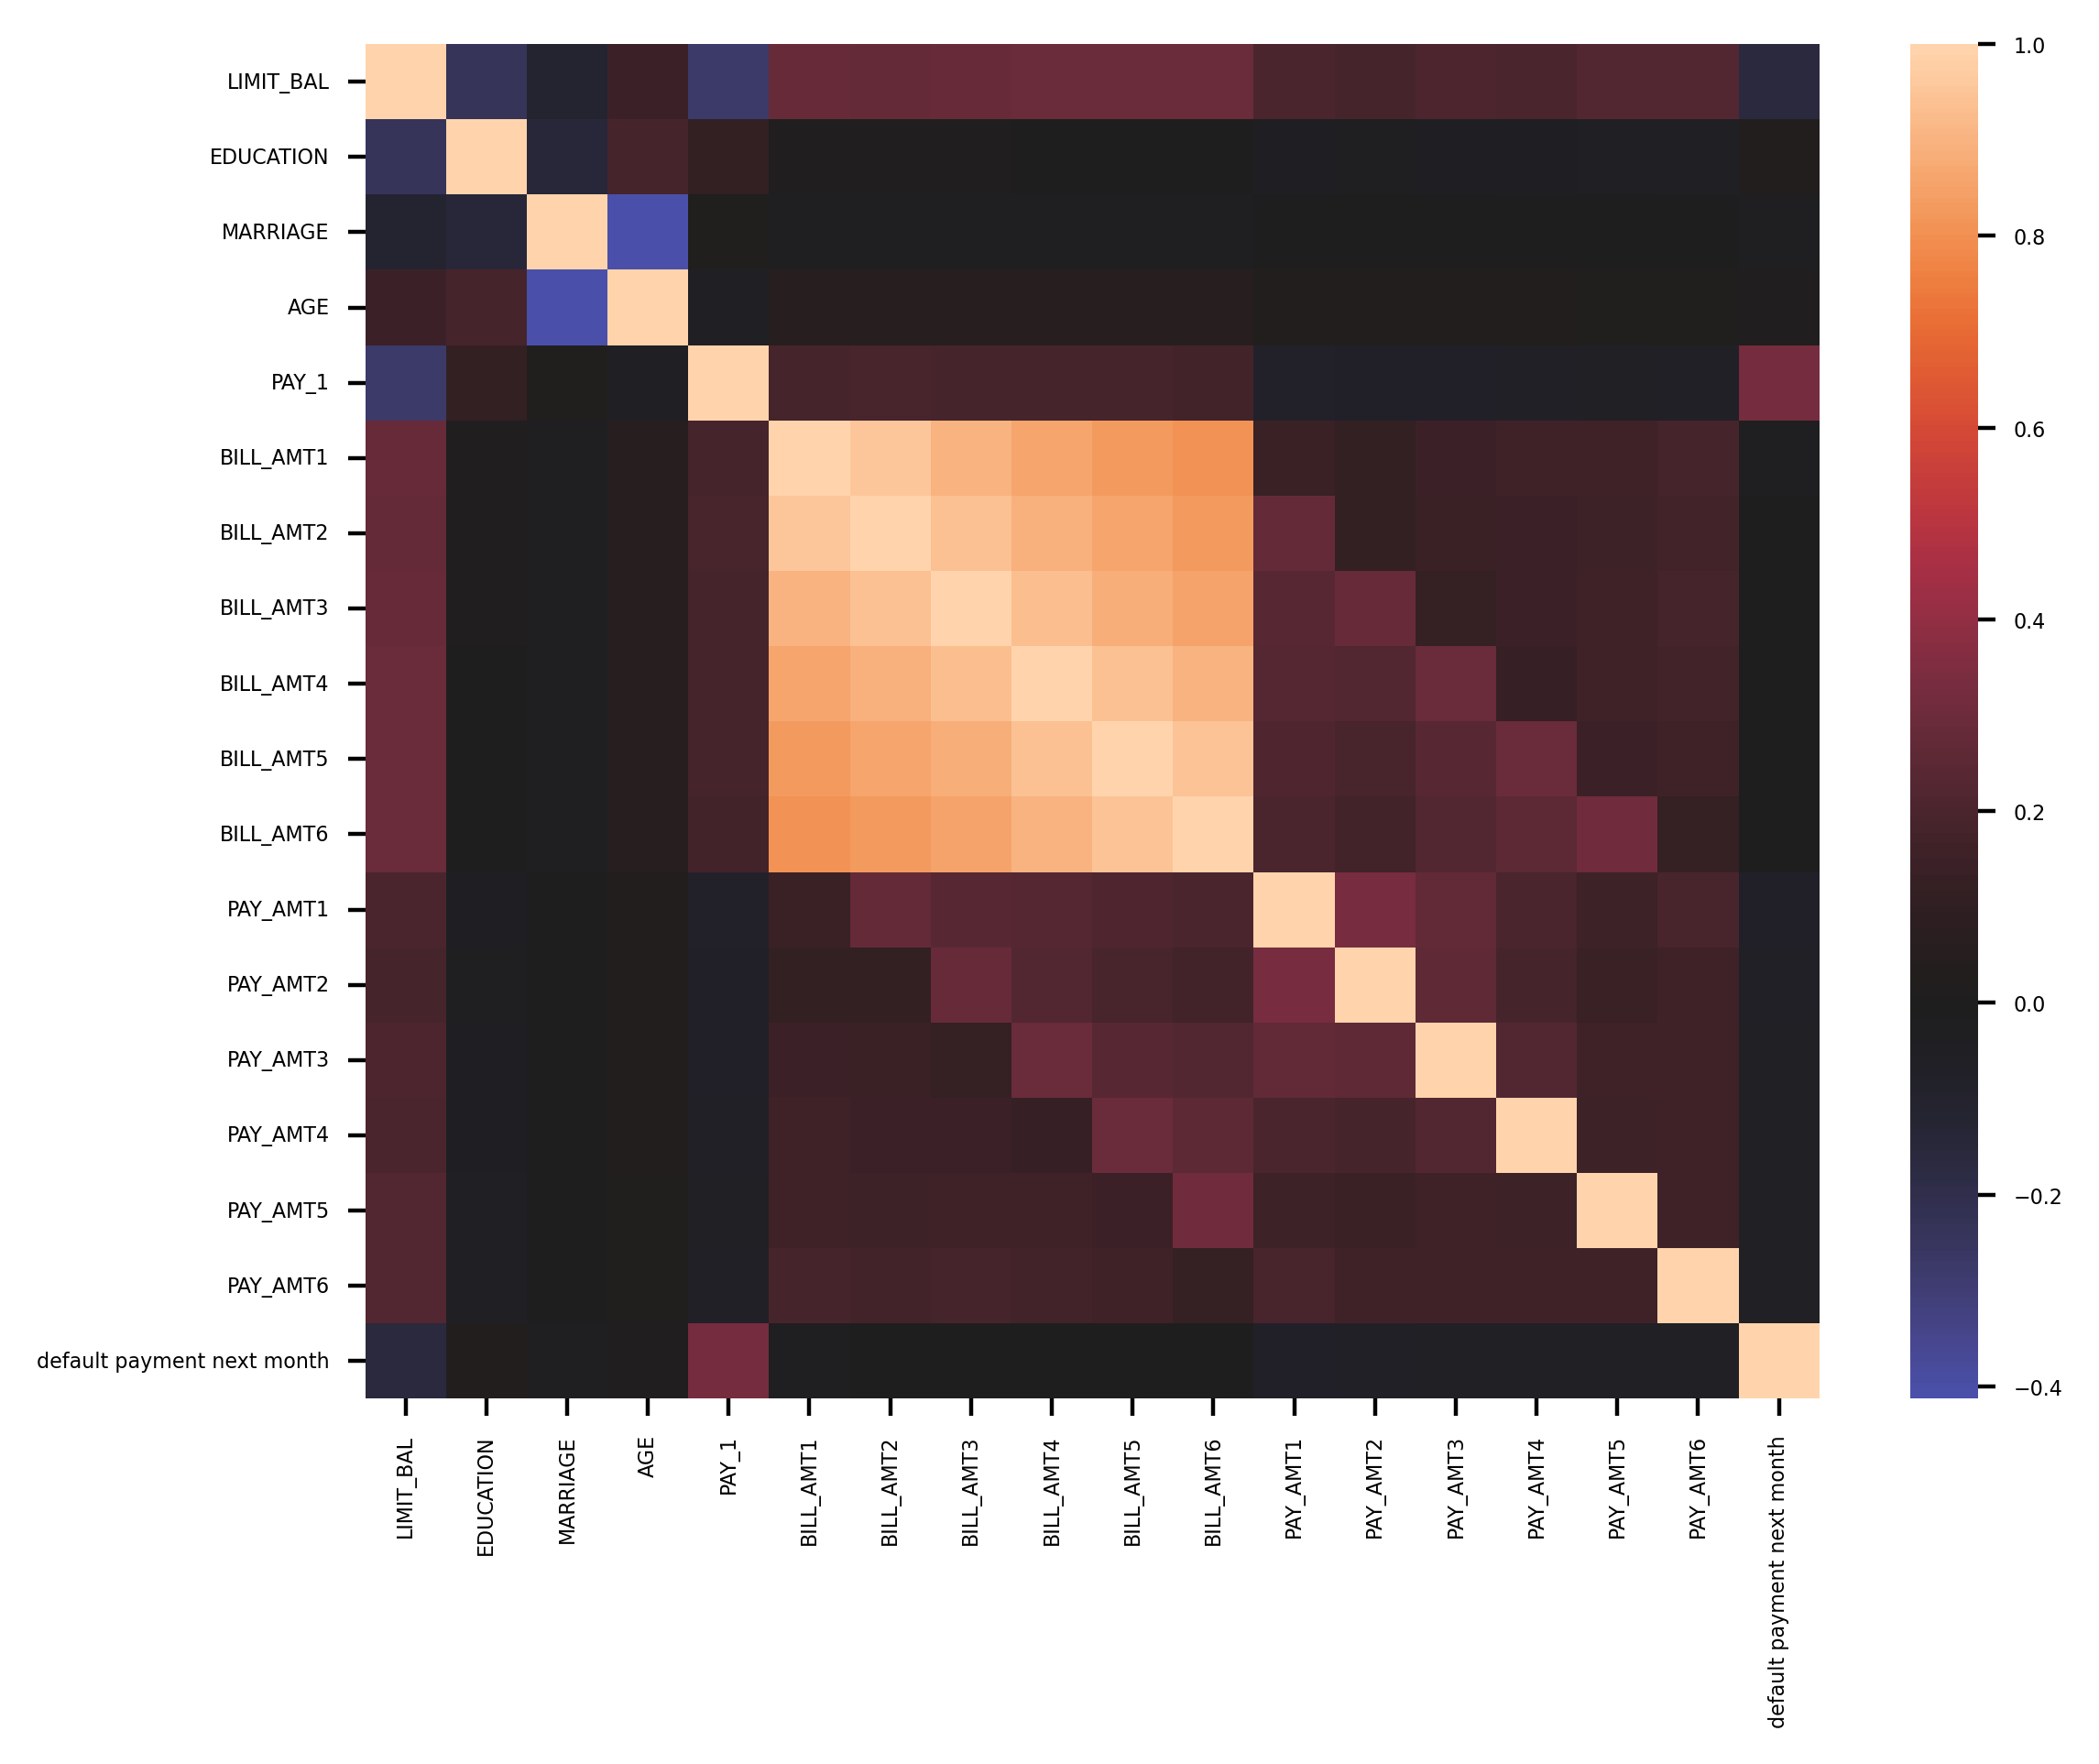

In [162]:
mpl.rcParams['font.size'] = 4
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)               # we want the center of the colorbar to be 0

In [163]:
# the most predictive features based on correlation
corr.iloc[-1,:].sort_values(key=lambda x: abs(x), ascending=False)

default payment next month    1.000000
PAY_1                         0.325365
LIMIT_BAL                    -0.154423
PAY_AMT1                     -0.072431
PAY_AMT2                     -0.061555
PAY_AMT3                     -0.058010
PAY_AMT5                     -0.056651
PAY_AMT6                     -0.054838
PAY_AMT4                     -0.054572
EDUCATION                     0.034966
MARRIAGE                     -0.026030
BILL_AMT1                    -0.020508
BILL_AMT3                    -0.014649
BILL_AMT2                    -0.014579
AGE                           0.014334
BILL_AMT4                    -0.011349
BILL_AMT5                    -0.006753
BILL_AMT6                    -0.006274
Name: default payment next month, dtype: float64

#### Correlation only valid for linear relationships

In [164]:
n_points = 500
np.random.seed(seed=2)
X = np.random.uniform(low=0.0, high=10.0, size=(n_points,))
slope = 0.25
noise = 0.2
y = []
y.append(slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,))) # strong positive correlation
y.append(-slope*X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)))  # strong negative correlation
y.append(np.random.normal(loc=0.0, scale=noise, size=(n_points))) # weak correlaton
y.append(np.sin(X/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(n_points,)))# non-linear association

In [165]:
# NumPy correlation matrix 
np.corrcoef(X, y[3])       # non-linear association not captured by Pearson correlation

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

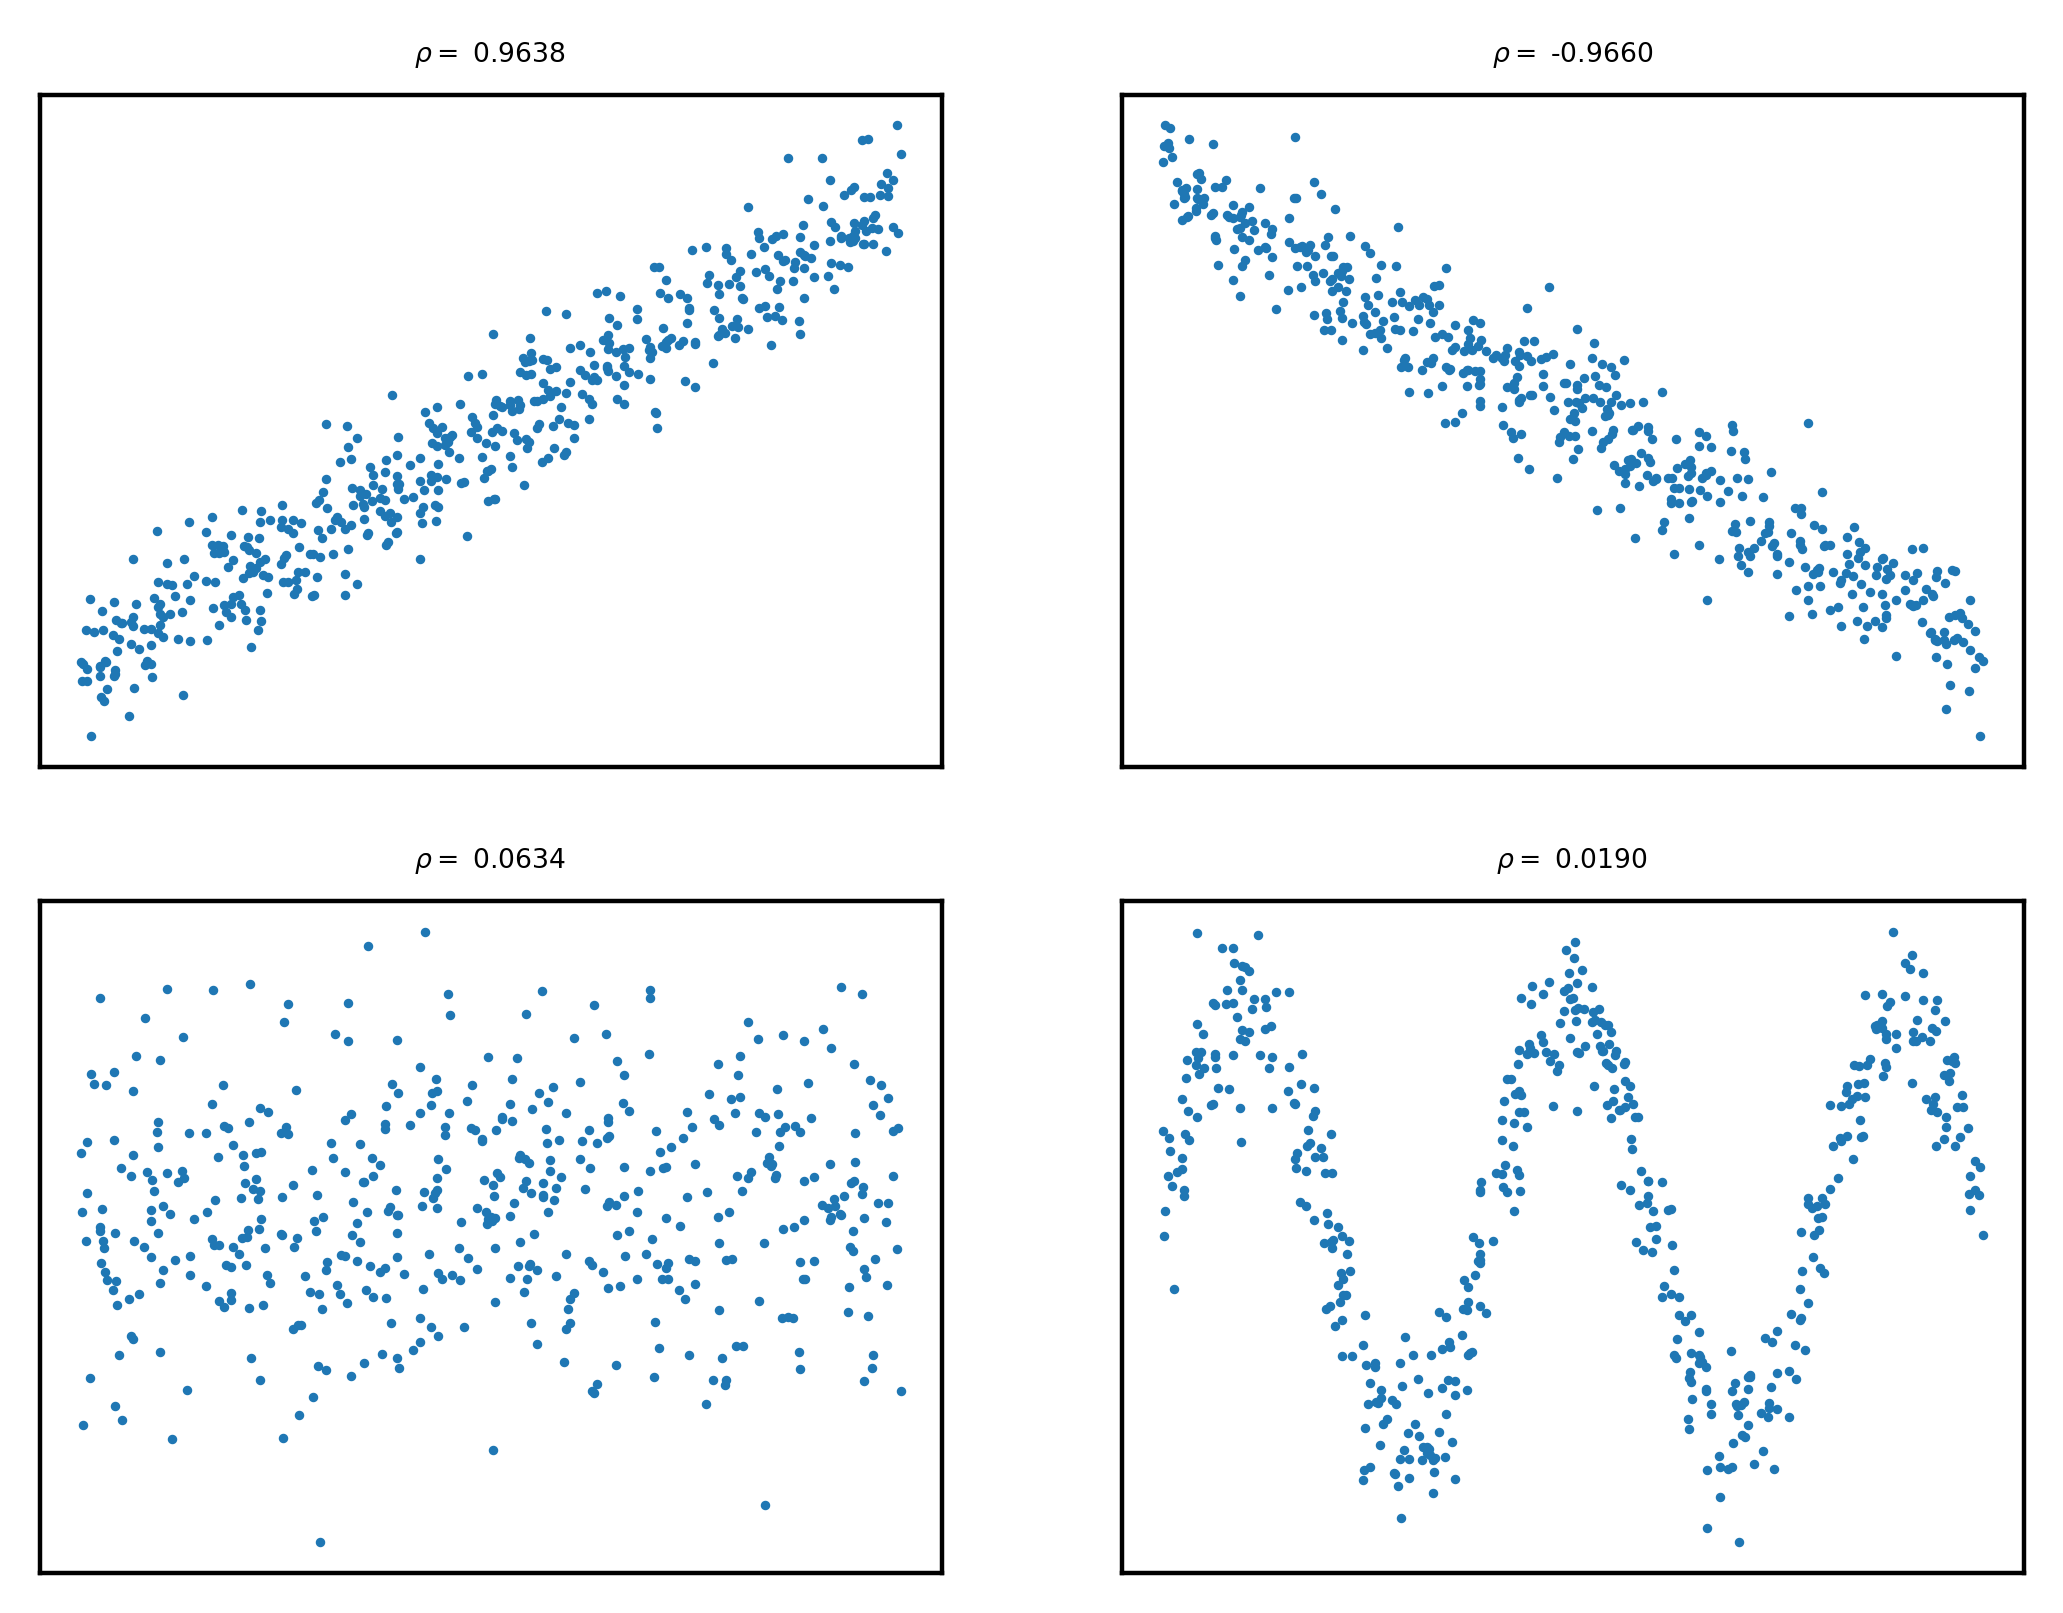

In [166]:
fig_h, ax_h  = plt.subplots(2,2)
counter = 0 
correlations = []
titles = ['A', 'B', 'C', 'D']
for axis in ax_h.flatten():
    axis.scatter(X, y[counter], s=0.5)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(titles[counter])
    correlations.append(np.corrcoef(X,y[counter])[0,1])  # Pearson linear coefficient
    axis.set_title(f"$\\rho = $ {correlations[-1]:.4f}") # excape the LaTeX \
    counter += 1


In [167]:
correlations

[0.9637513276497903,
 -0.9659993956705689,
 0.06339625904219301,
 0.019007055545229242]

#### F-Test and Univariate Feature Selection

Pearson correlation is theoretically valid for continuous response variables. A binary response variable could be considered categorical data with only two categories: 0 and 1. One test we can run to see whether features are associated with a categorical response is the ANOVA F-test (ANOVA stands for analysis of variance). The ANOVA F-test can be contrasted with the regression F-test (which is similar to Pearson correlation).

In scikit-learn, the ANOVA F-test function, f_classif.ANOVA, outputs F-statistics as well as p-values. The p-value in this context answers the question: "For the samples in the positive class, how likely is it that the average value of this feature is the same as that of samples in the negative class?" If a feature has very different average values between the positive and negative classes:
- It will be very unlikely that those average values are the same (low p-value)
- It will probably be a good feature in our model because it will help us discriminate between positive and negative classes.

F-test can be used for univariate feature selection: the practice of testing the features one by one against the response variable, to see which ones have predictive power.

In [168]:
X = df[features_response].iloc[:, :-1].values   # select features_response cols, all rows, all but last column
y = df[features_response].iloc[:,-1].values     # select features_response cols, all rows, only last column
print(X.shape, y.shape)

(26664, 17) (26664,)


In [169]:
# ANOVA F-test for categorical response variable
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X,y)    # outputs F-statistic and p-value comparing each feature to response 

In [170]:
f_test_df = pd.DataFrame({'Feature': features_response[:-1],    # up to but not including last value
                          'F statistic': f_stat,
                          'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [171]:
# Univariate feature selection with SelectPercentile
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif,      # instanciate object, selection criteria is ANOVA F-test
                            percentile=20)  # select top 20% of features by criteria 

selector.fit(X,y)                           # fit object to features and response data    

SelectPercentile(percentile=20)

In [172]:
# get feature indices that were selected by selector object
best_feature_ix = selector.get_support()    # get_support() method of selector object
best_feature_ix                             # boolean mask (logical index) for selecting features

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [173]:
features = features_response[:-1]       # select the features to match X supplied to selector object

In [174]:
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

#### Visualizing the relationship between features and response variable

In [175]:
overall_default_rate = df['default payment next month'].mean()      # rate of positive class across dataset
overall_default_rate

0.2217971797179718

In [176]:
# Default rate per PAY_1 categories (PAY_1 is a hybrid categorical (good standing) and numerical (months late))
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month': np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


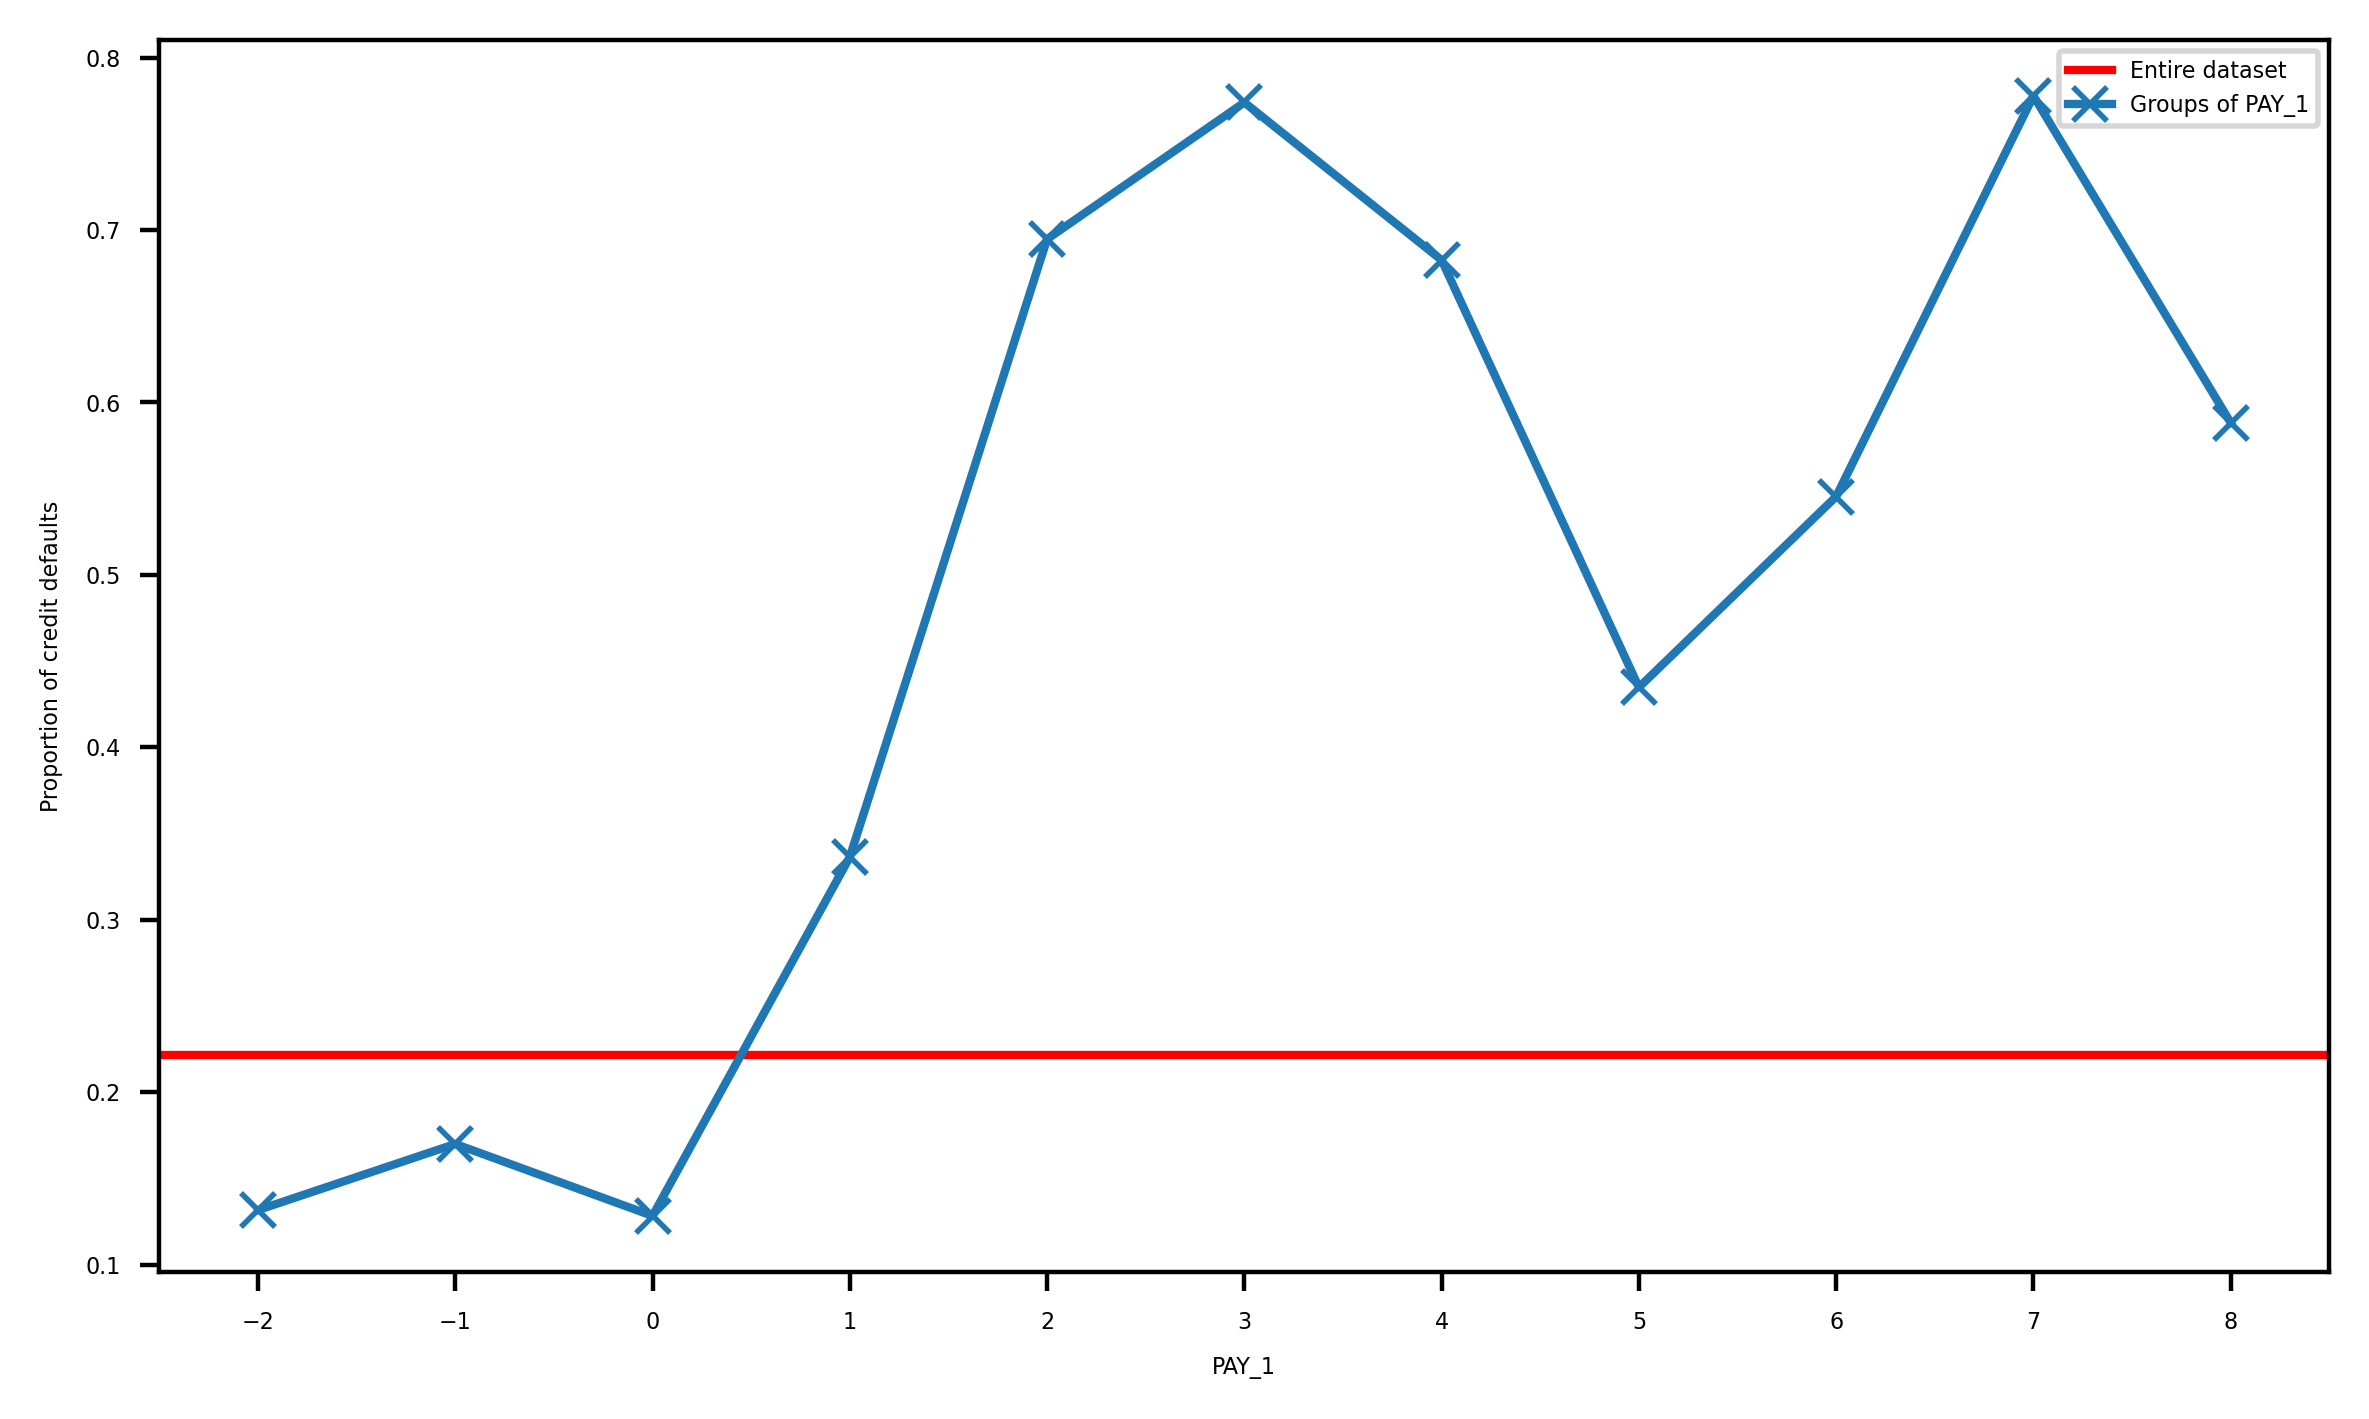

In [177]:
# Visualize categorical data as mean positive class per category over overall positive class mean
plt.figure(figsize=(7,4))
axes = plt.axes()                                   # create an axes object
axes.axhline(overall_default_rate, color='red')     # plot overall default rate as red horizontal line
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes) # plot group means over overall mean on same axes
axes.set_ylabel('Proportion of credit defaults')
axes.set_xticks(range(-2, 9))
axes.legend(['Entire dataset', 'Groups of PAY_1'])

Text(0.5, 1.0, 'Credit limits by response variable')

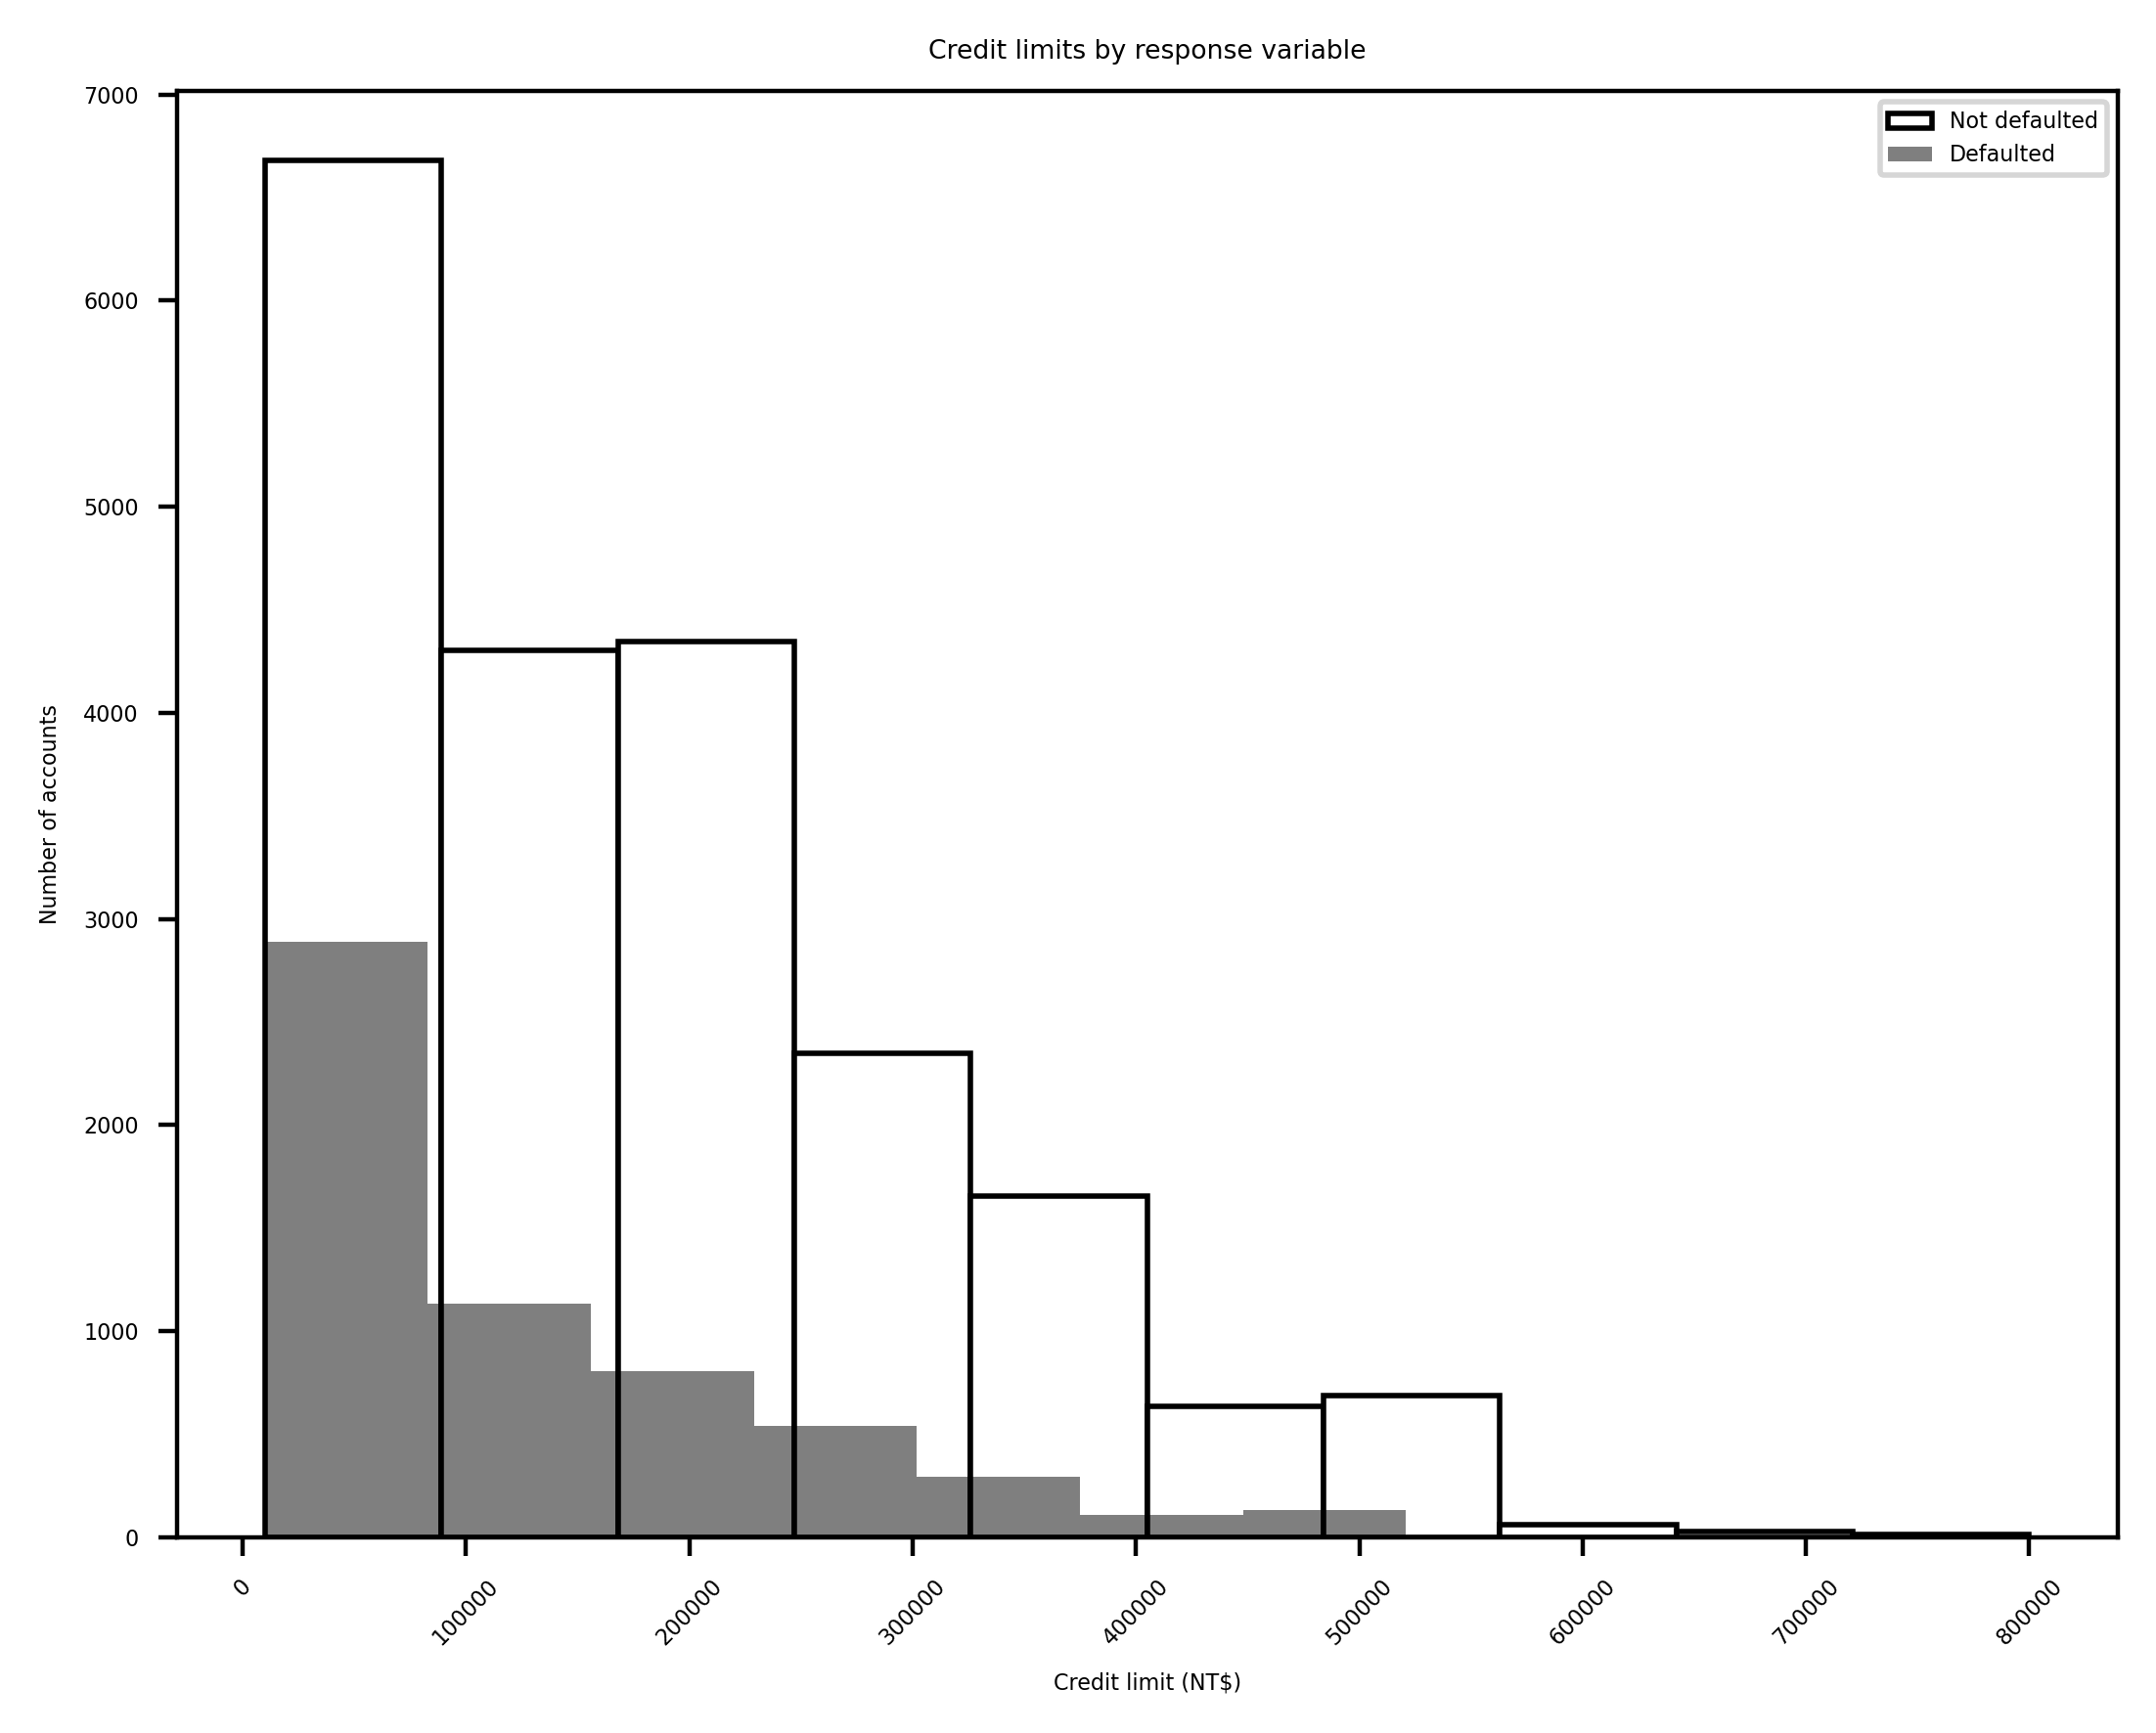

In [178]:
# visualize numerical feature as histograms for each class
pos_mask = y == 1   # logical mask for positive samples
neg_mask = y == 0   # logical mask for negative samples 

axes = plt.axes()   # axes object
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], edgecolor='black', color='white') # .loc for logical/column name index
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, edgecolor=None, color='black') # alpha for transparent color
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

Since LIMIT_BAL is a numerical feature, to visualize its effect on default rate, we plot a histogram for negative and positive classes. The histograms show size differences which tells us that most accounts don't default which we already knew from the class fractions in the datasets. We need to demonstrate shape differences between classes based on LIMIT_BAL. For this we normalize the area in each histogram, effectively creating a probability mass function. 

Since the maximum credit limit in our dataset is NT$800,000, we decide on 16 bins with NT$50,000 increments. For a normalized histogram, the bin heights are calculated by dividing the count by the  number of observations times the bin width. In otherwods, we multiply the y-axis tick labels by the bin width of NT$50000 for the bin heights to represent the proportion of the total number samples in each bin.

In [179]:
df['LIMIT_BAL'].max()       # the maximum column value will guide our choice of bin widths

800000

In [180]:
# decide on number of bins 
bin_edges = np.arange(0,850000,50000)
print(bin_edges) # bin edges are closed right open left , except last bin which is closed both.

[     0  50000 100000 150000 200000 250000 300000 350000 400000 450000
 500000 550000 600000 650000 700000 750000 800000]


/var/folders/35/13t91srs6wg9ml5d___c_nh40000gn/T/ipykernel_2074/1867700662.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))     # multiply by bin width and round to get proportion


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

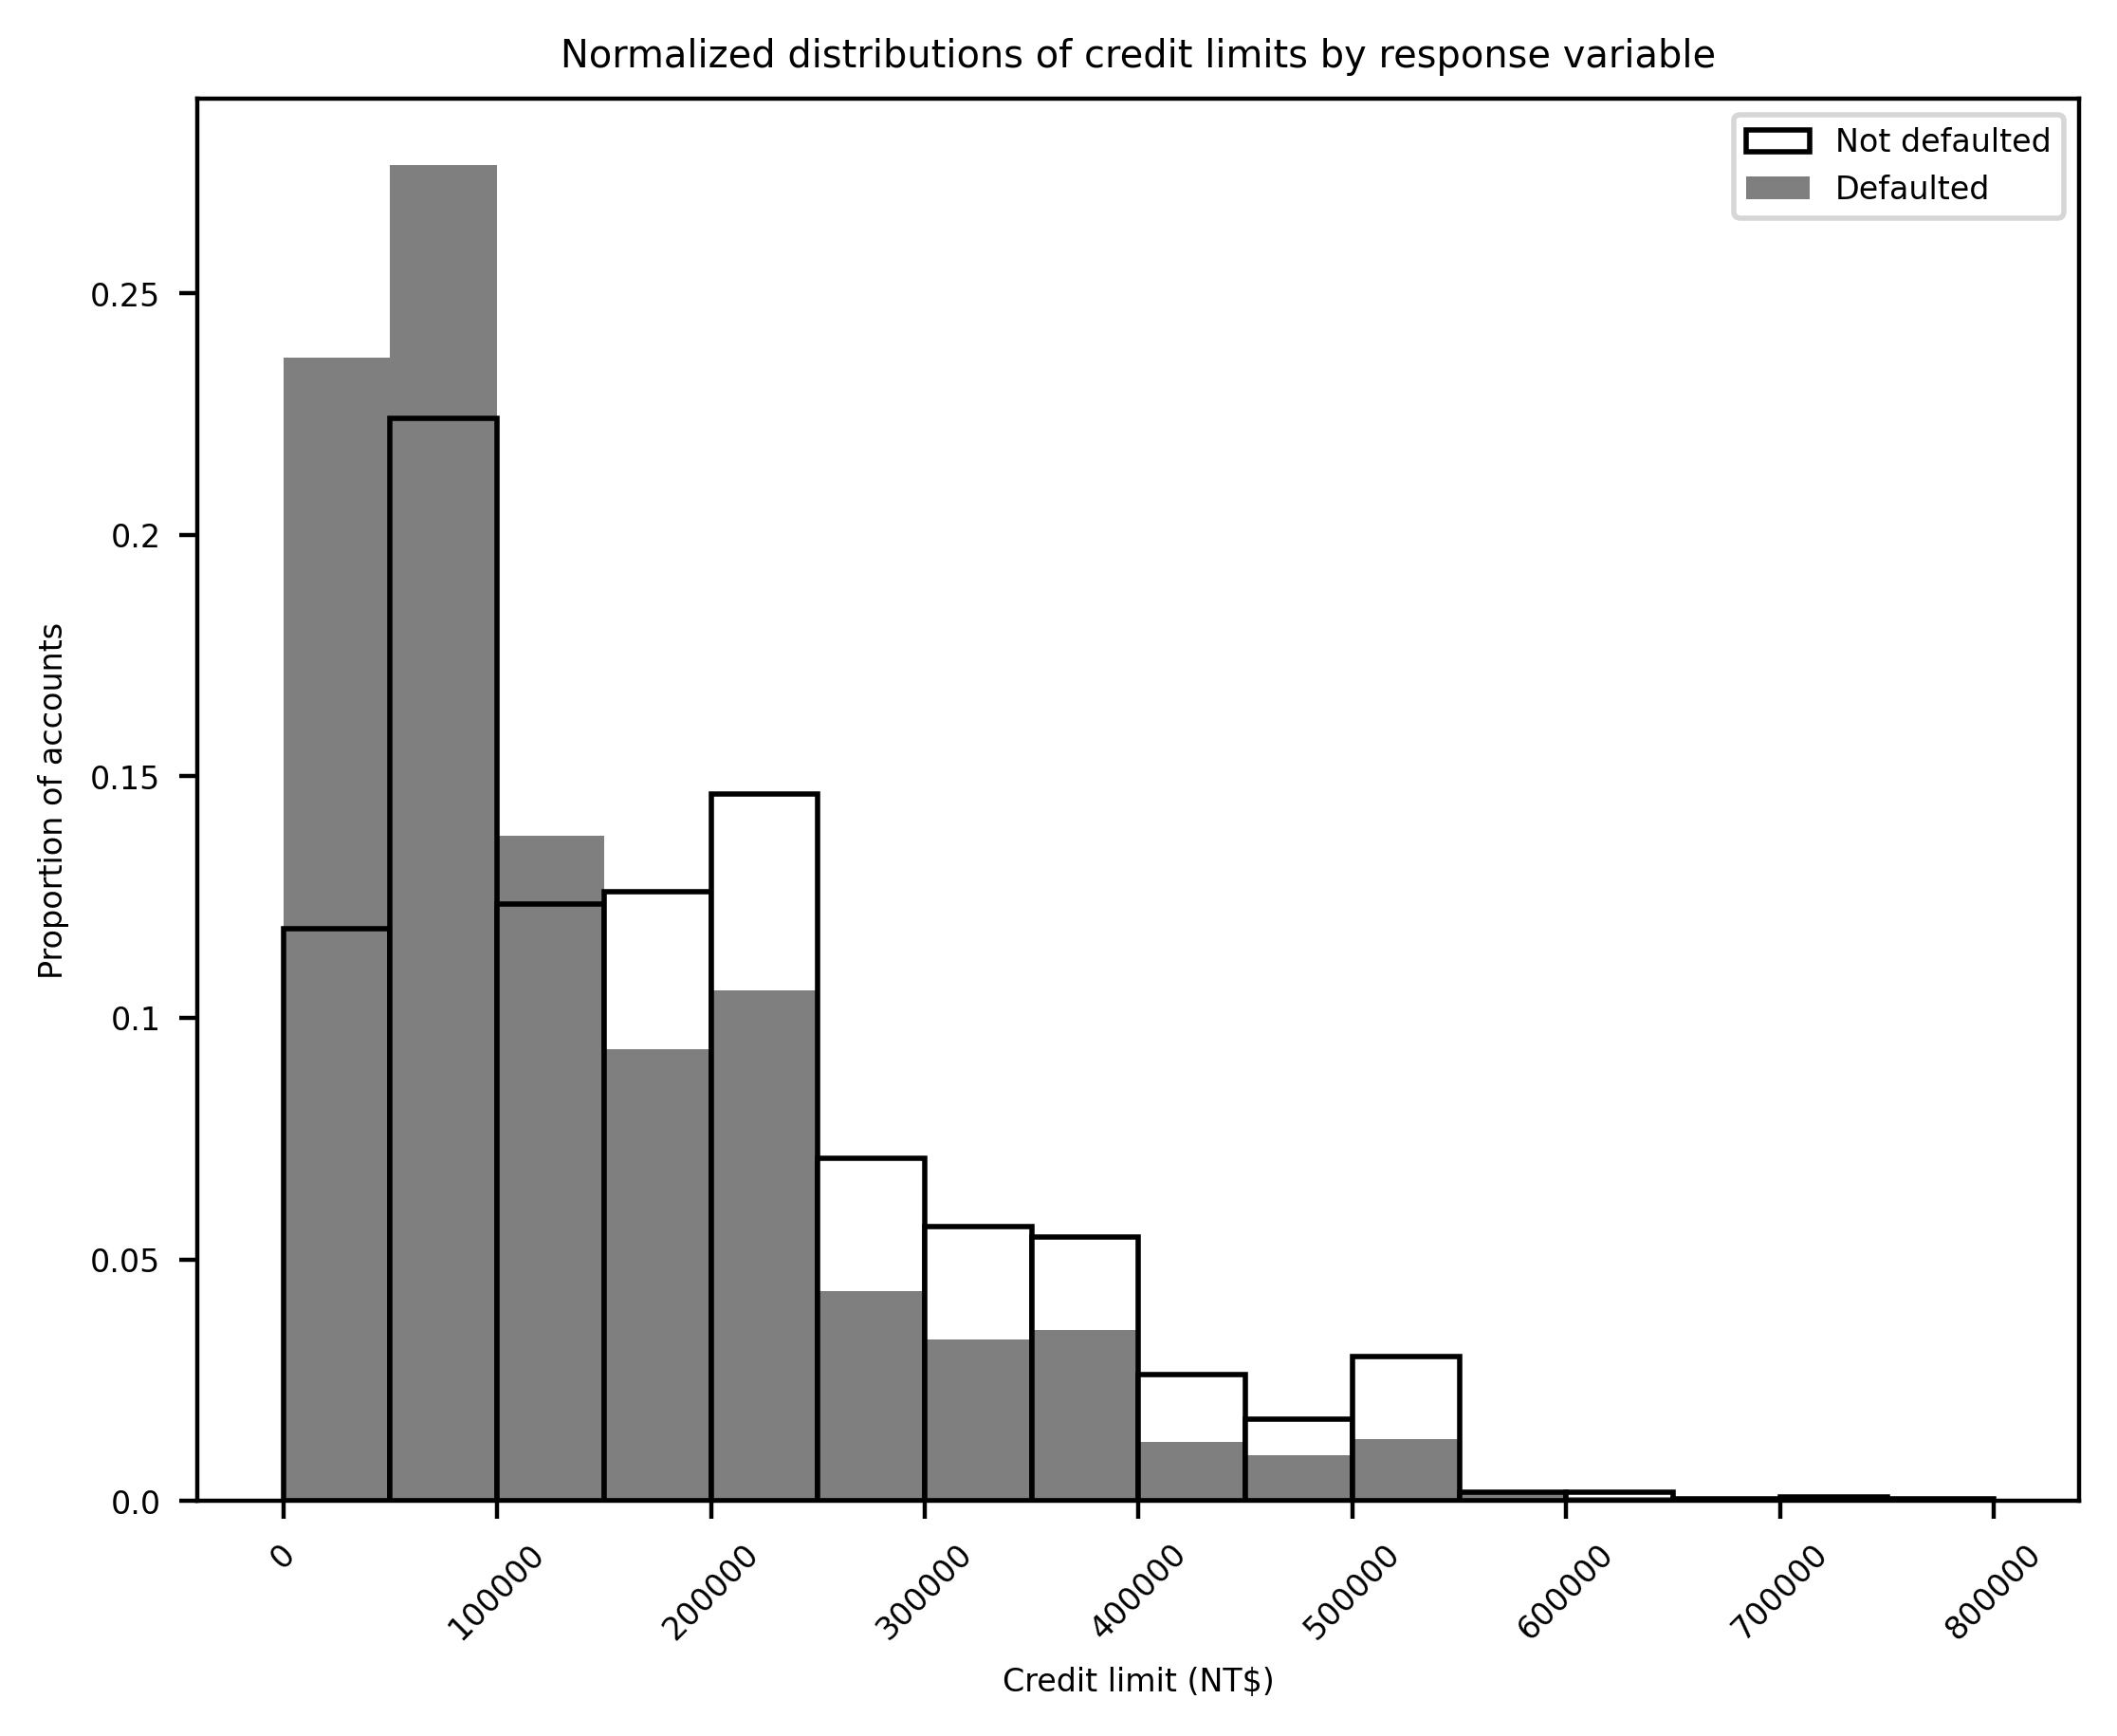

In [181]:
#
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 6
axes = plt.axes()
axes.hist(
    df.loc[neg_mask, 'LIMIT_BAL'],                  # histogram of balance limits for non-default accounts
    bins=bin_edges, density=True,                   # density = True, normalizes histogram into a pmf
    edgecolor='black', color='white')
    
axes.hist(
    df.loc[pos_mask, 'LIMIT_BAL'],                  # histogram of balance limits for defaulted accounts
    bins=bin_edges, density=True,
    alpha=0.5, edgecolor=None, color='black')

axes.tick_params(axis='x', labelrotation=45)        # tick properties to rotate x axis labels by 45°
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()                         # default ticks assigned by matplotlib
axes.set_yticklabels(np.round(y_ticks*50000,2))     # multiply by bin width and round to get proportion 
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')


It looks like accounts that defaulted tend to have a higher porportion of lower credit limits. Accounts with credit limits less than NT$150,000 are relatively more likely to default, while the opposite is true for accounts with limits higher than this.

In [182]:
def my_mean(input_argument):
    output = sum(input_argument) / len(input_argument)
    return (output)

In [183]:
my_mean([1,2,3,4,5])

3.0

#### The sigmoid or logistic function

In [184]:
# natural logarithm
np.exp(1)

2.718281828459045

In [185]:
np.exp(0)

1.0

In [186]:
# vectorized implementation of natural logarithm
X_exp = np.linspace(-4, 4, 81)  #  np.linspace() takes start, stop (both inclusive), num vals (ie decimals)
print(X_exp[:5])                # first 5 values
print(X_exp[-5:])               # last 5 values

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [187]:
Y_exp = np.exp(X_exp)           # vectorized implementation
Y_exp[:5]   

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Text(0.5, 1.0, 'Plot of $e^X$')

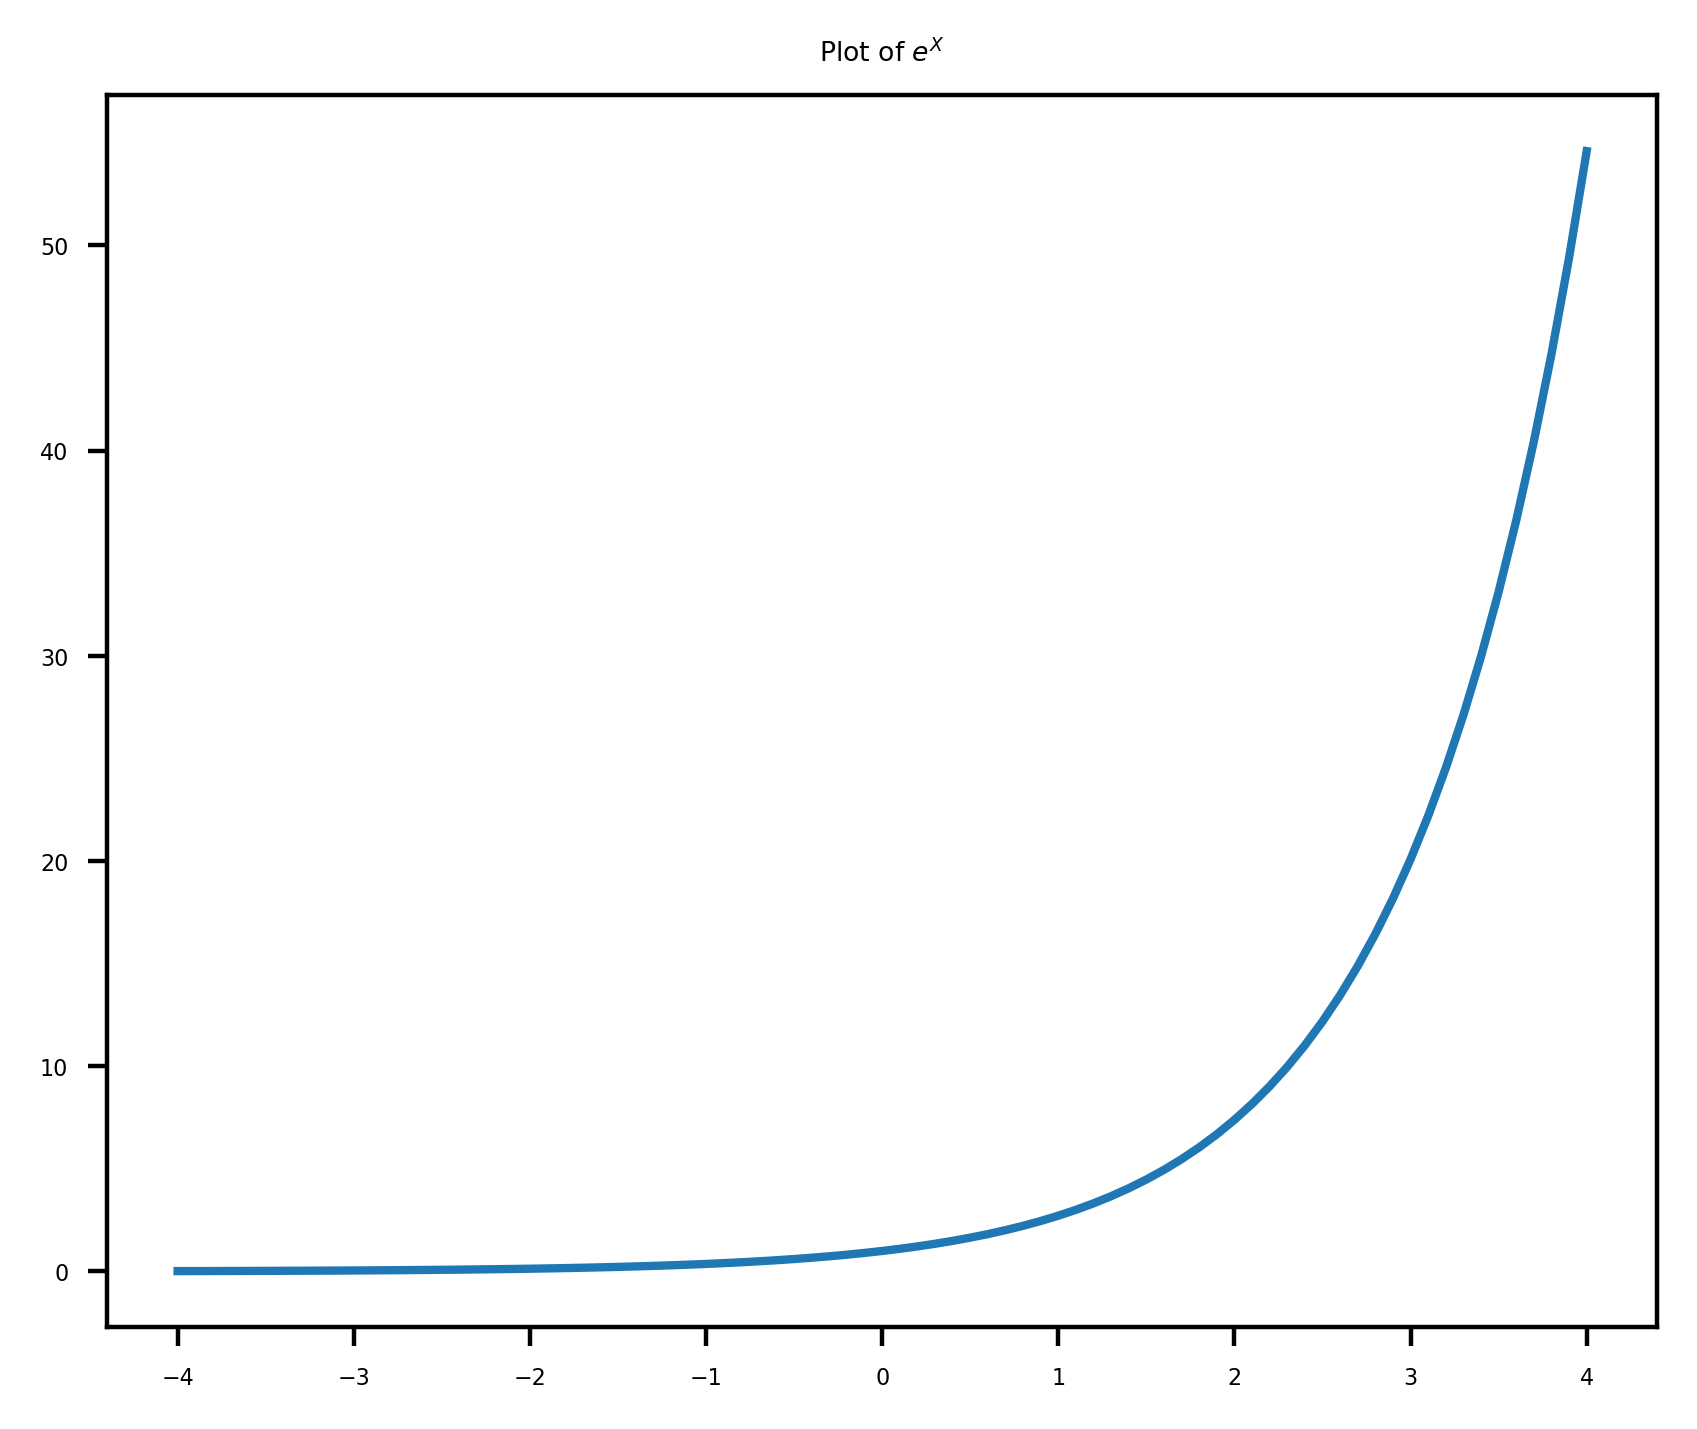

In [189]:
mpl.rcParams['font.size']=4
plt.figure(figsize=(5,4))
plt.plot(X_exp, Y_exp)
plt.title(f'Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

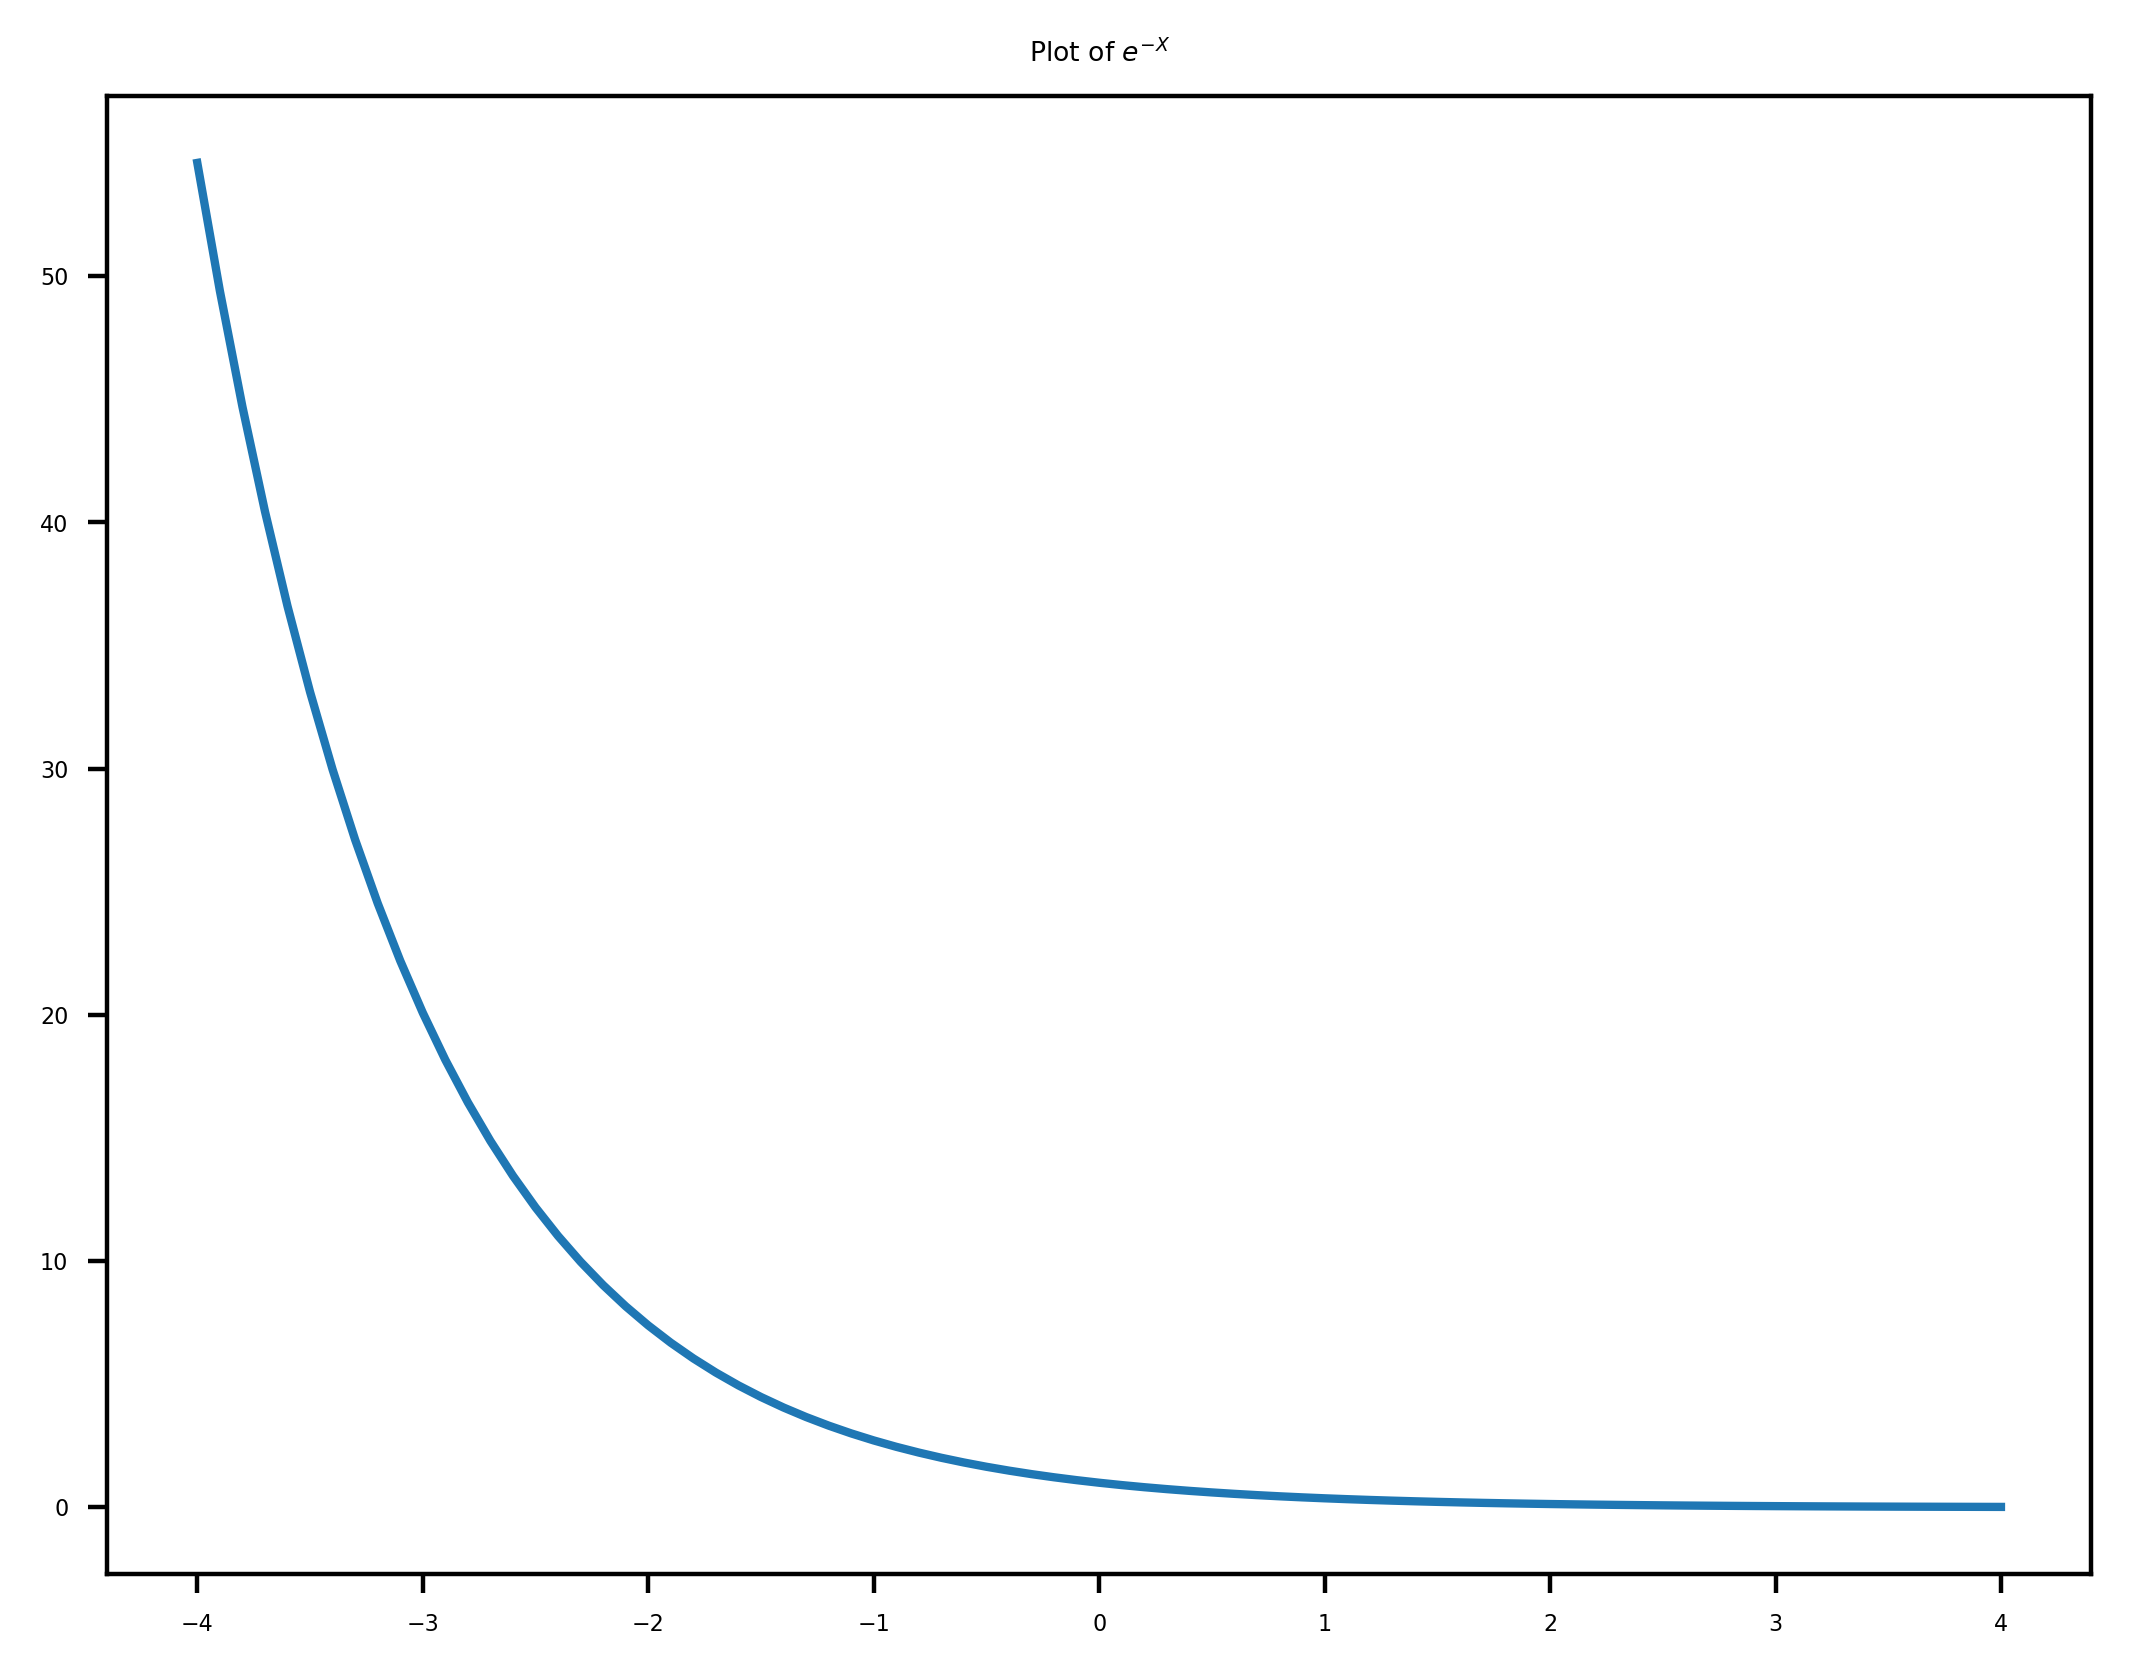

In [190]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [194]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

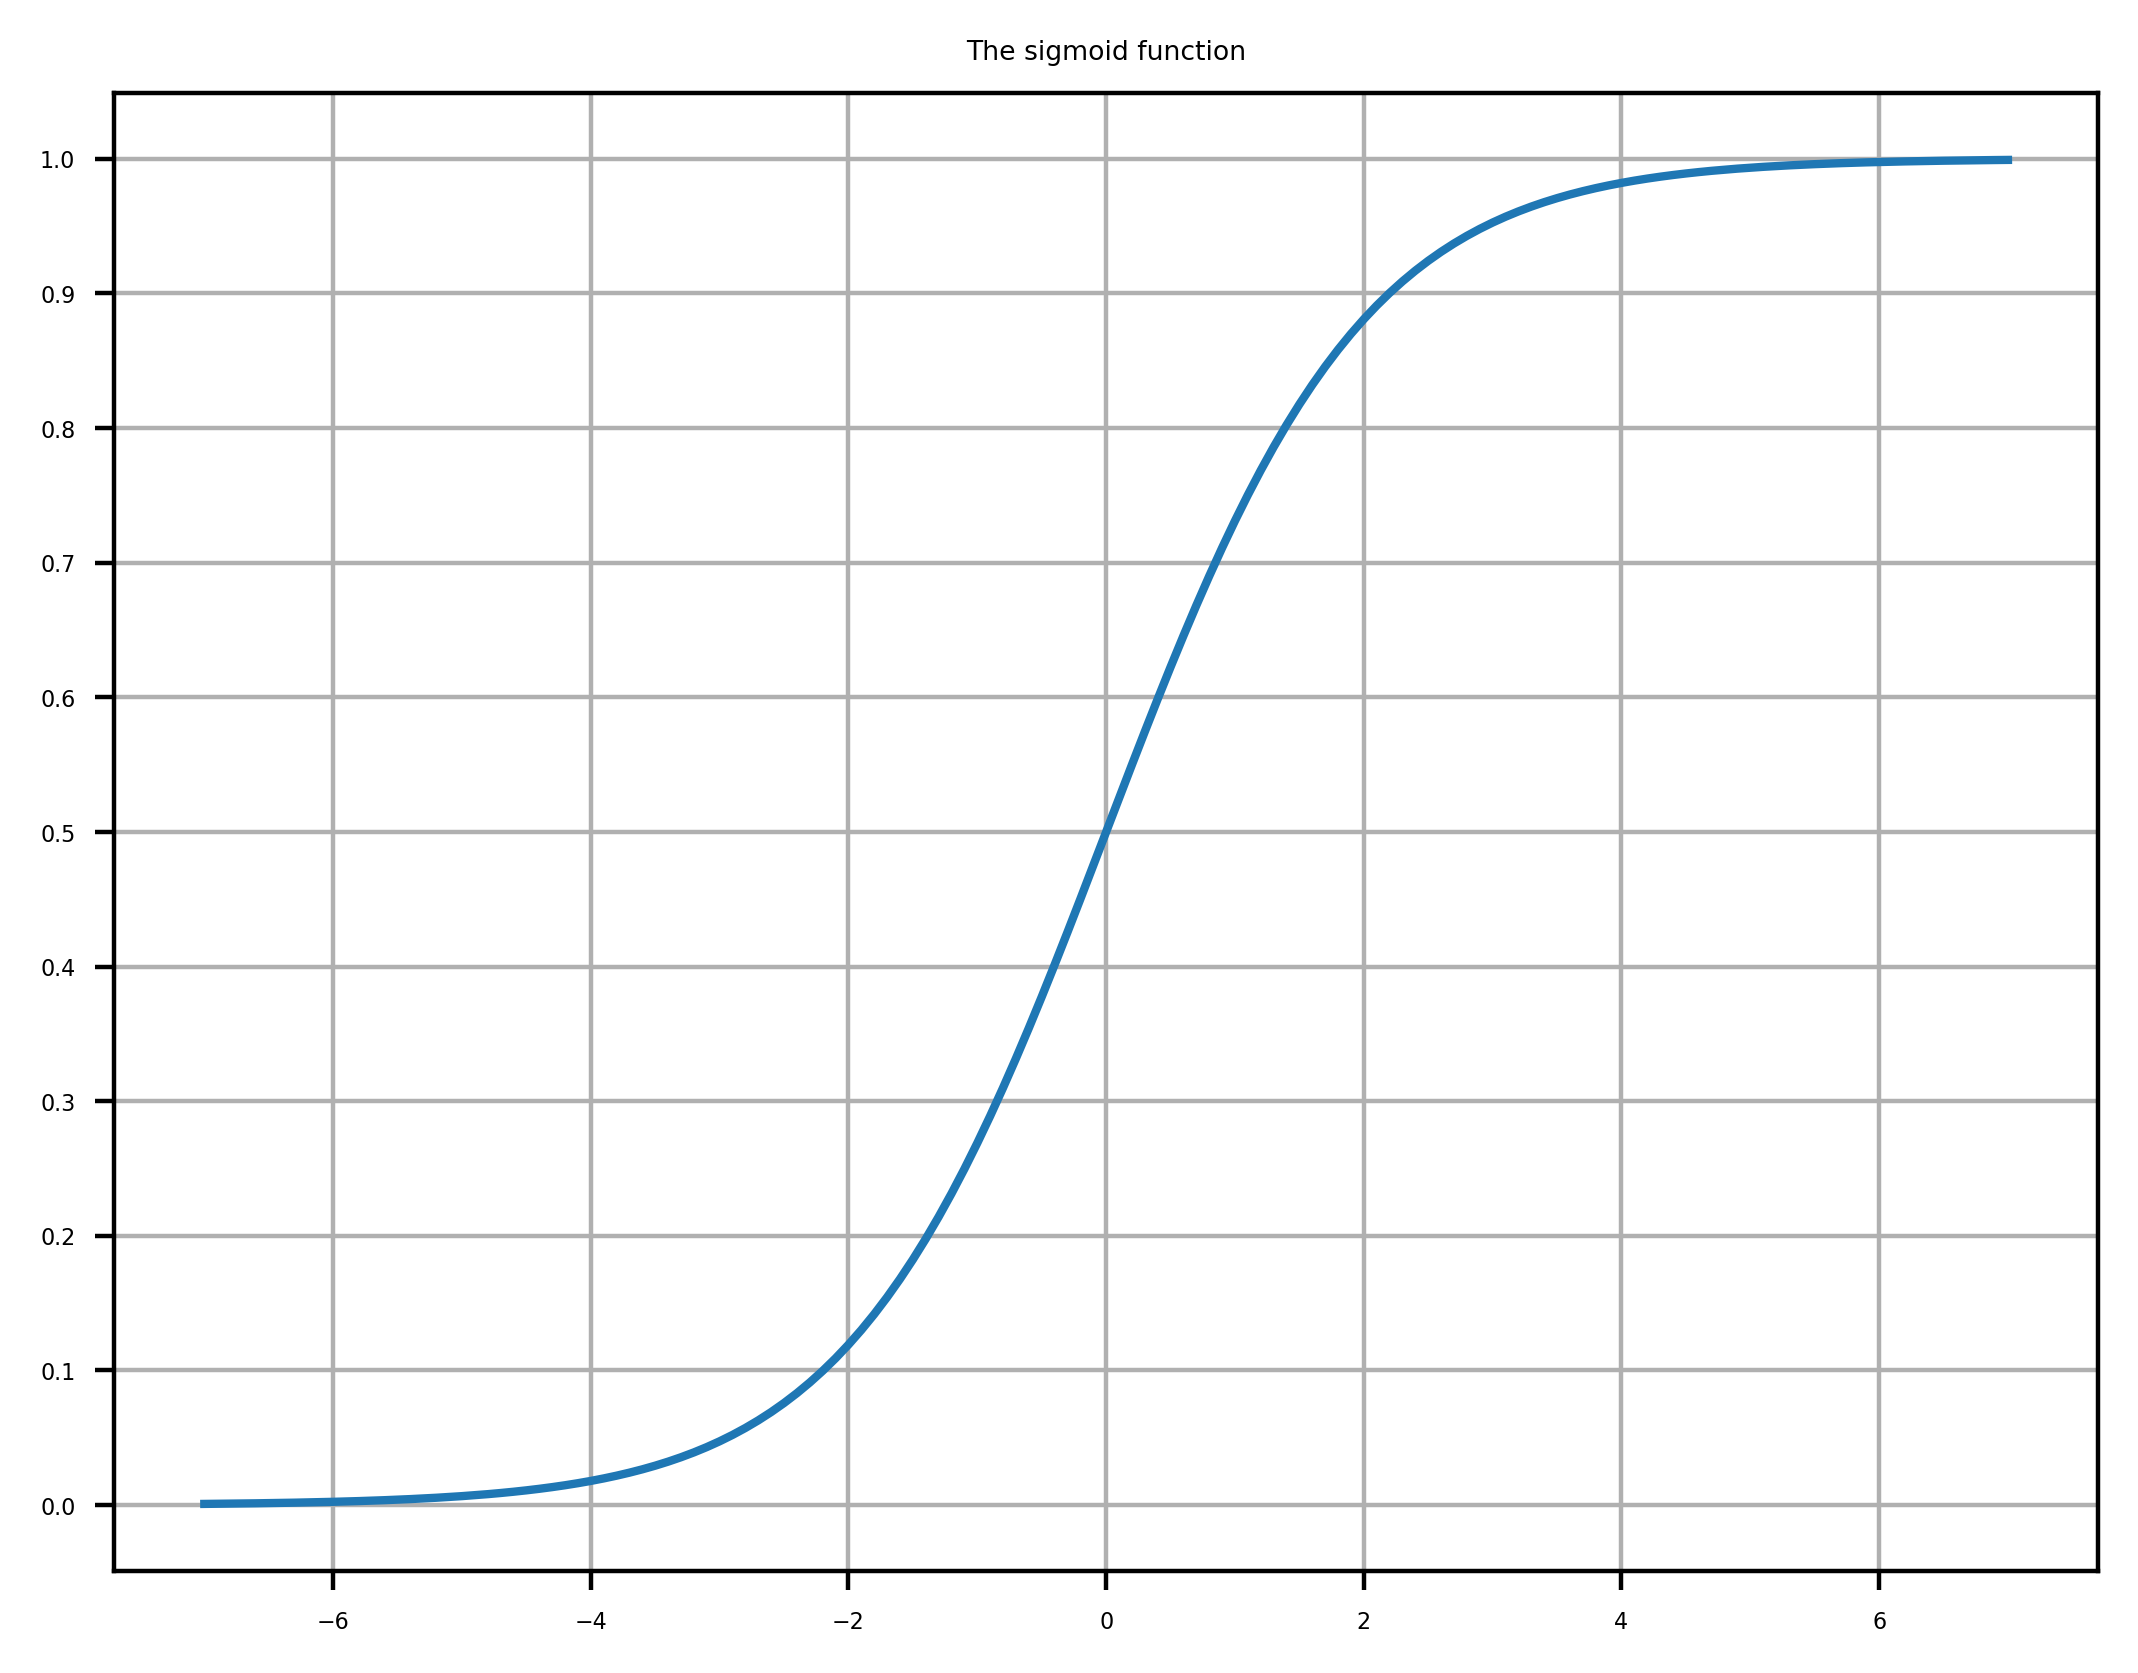

In [195]:
# logistic regression prob. of class membership never equals 0 or 1 because sigmoid function never does
X_sig = np.linspace(-7, 7, 141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

#### Linear combination of features in log odds (Logistic Regression)

The formal assumption of logistic regression is that the featues are linear in the log odds.

$\theta_0+\theta_1X_1+\theta_2X_2+...+\theta_jX_j=log(\frac{p}{1-p})$

In [196]:
# default rate for the different groups of PAY_1 (payment status last month)
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [198]:
# extract mean values of the response variables from these groups (probability of defaulting)
p = group_by_pay_mean_y['default payment next month'].values

In [199]:
# probability of not defaulting
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [202]:
odds_ratio = p/q
odds_ratio

array([0.15162791, 0.20482215, 0.14717742, 0.50693161, 2.27548209,
       3.42424242, 2.15      , 0.76923077, 1.2       , 3.5       ,
       1.42857143])

In [203]:
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [204]:
group_by_pay_mean_y.index

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

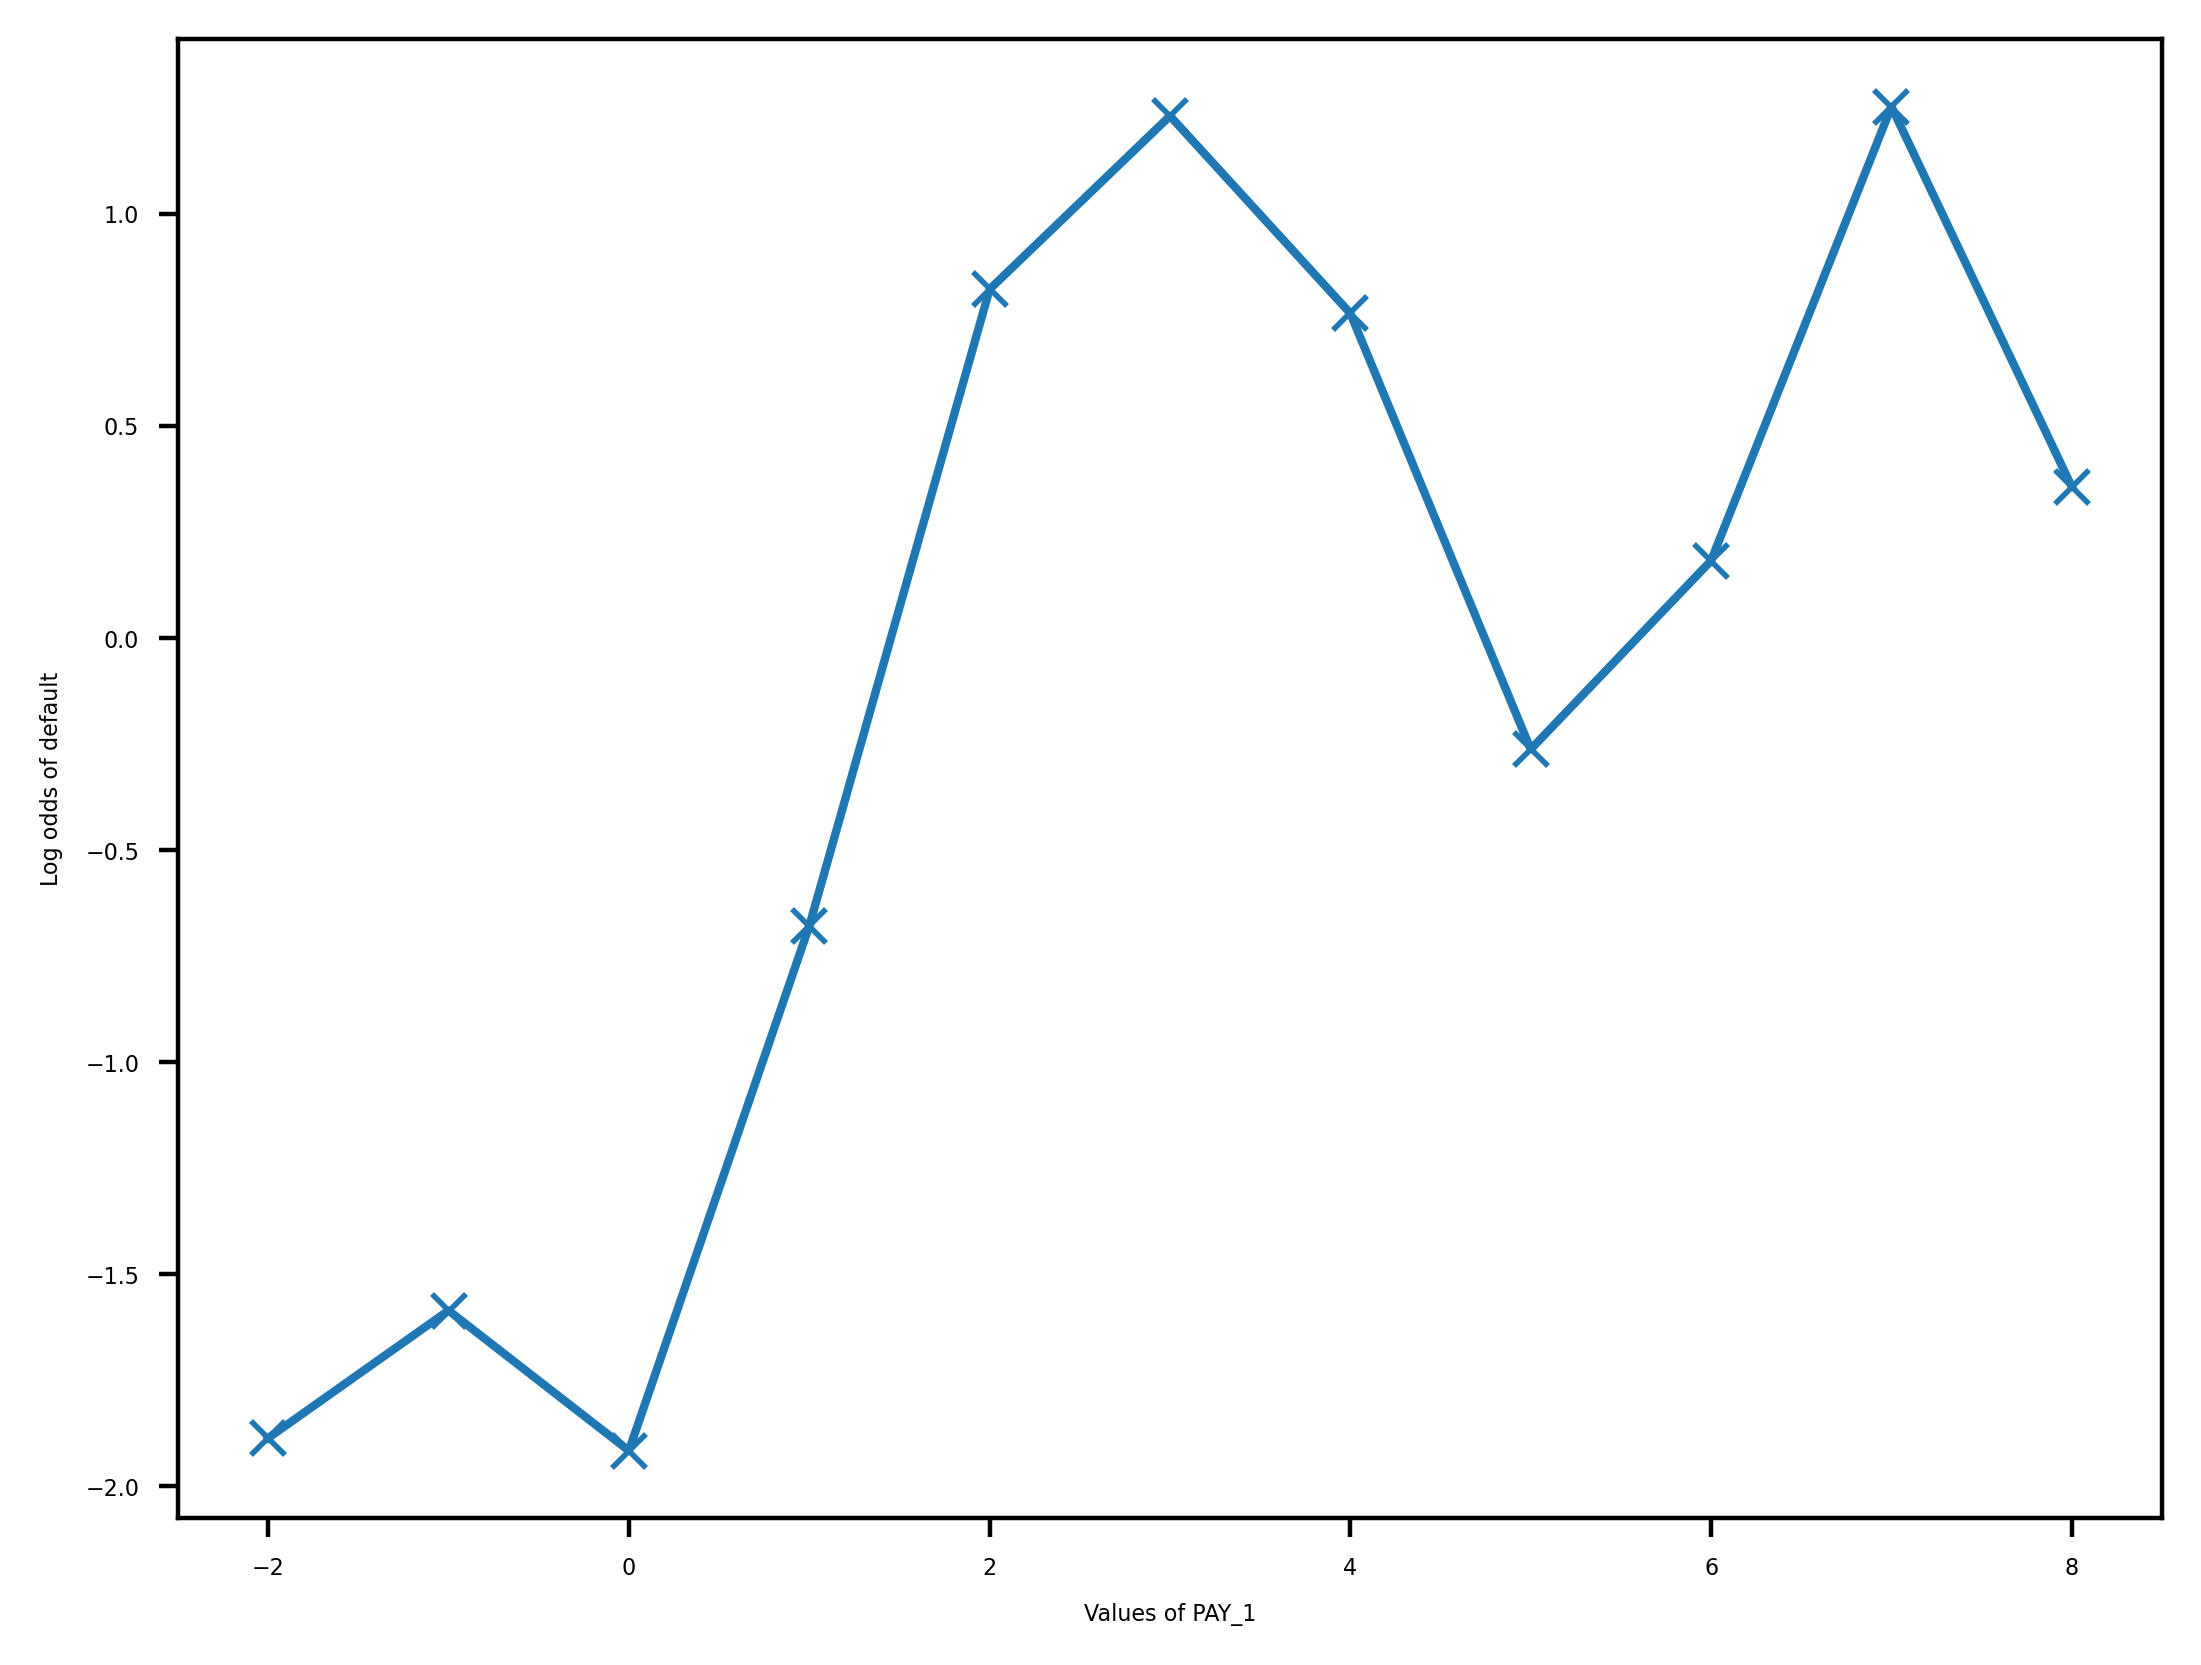

In [205]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

#### Linear Decision Boundary of Logistic Regression

For the case of two features, from the sigmoid function we know that $p\ge0.5$ when $X\ge0$. So if X = $\theta_0+\theta_1X_1+\theta_2X_2\ge0$, the predicted probability would be $p\ge0.5$ and the sample would be classified as positive. Otherwise $p\le0.5$ and the sample would be classified as negative. Using this observation, we can say that the linear boundary is $X_2\ge-(\theta_1/\theta_2)X_1 - (\theta_0/\theta_2)$

In [206]:
from numpy.random import default_rng

rg = default_rng(4)
X_1_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.65833663]
 [4.06796532]
 [6.85746223]]
[[7.93405322]
 [9.59962575]
 [7.65960192]]
[[5.15531227]
 [5.6237829 ]
 [2.14473103]]
[[6.49784918]
 [9.69185251]
 [9.32236912]]


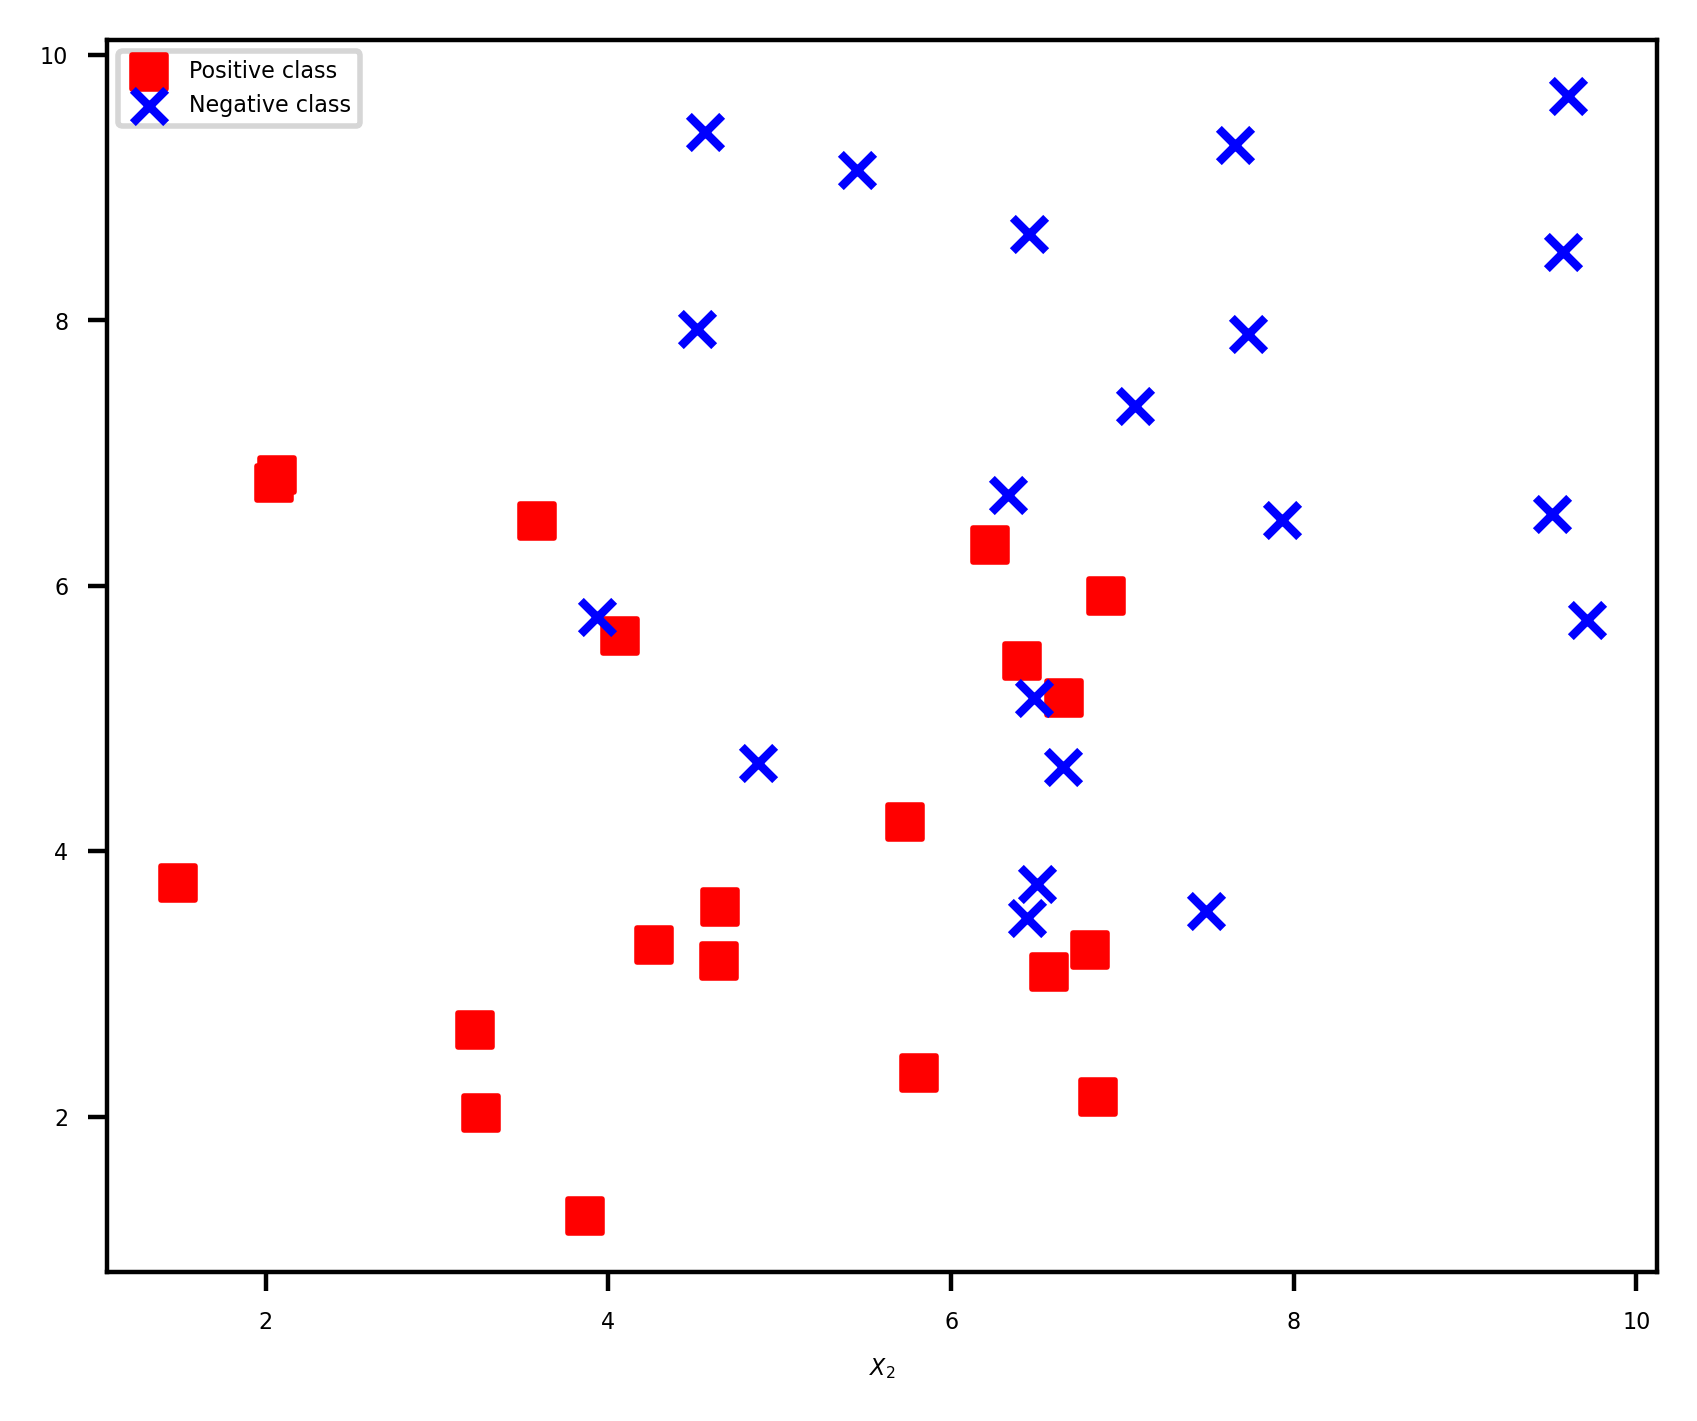

In [218]:
plt.figure(figsize=(5,4))
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.xlabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [219]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]]) # Assemble an nd-array from nested lists of blocks.
print(X.shape)
print(X[0:3])

(40, 2)
[[6.65833663 5.15531227]
 [4.06796532 5.6237829 ]
 [6.85746223 2.14473103]]


In [223]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,) # 20 ones, 20 zeros for response variable
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [225]:
from sklearn.linear_model import LogisticRegression 

example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [226]:
example_lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [228]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 0] 
positive_indices

[2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19, 26, 34, 36]

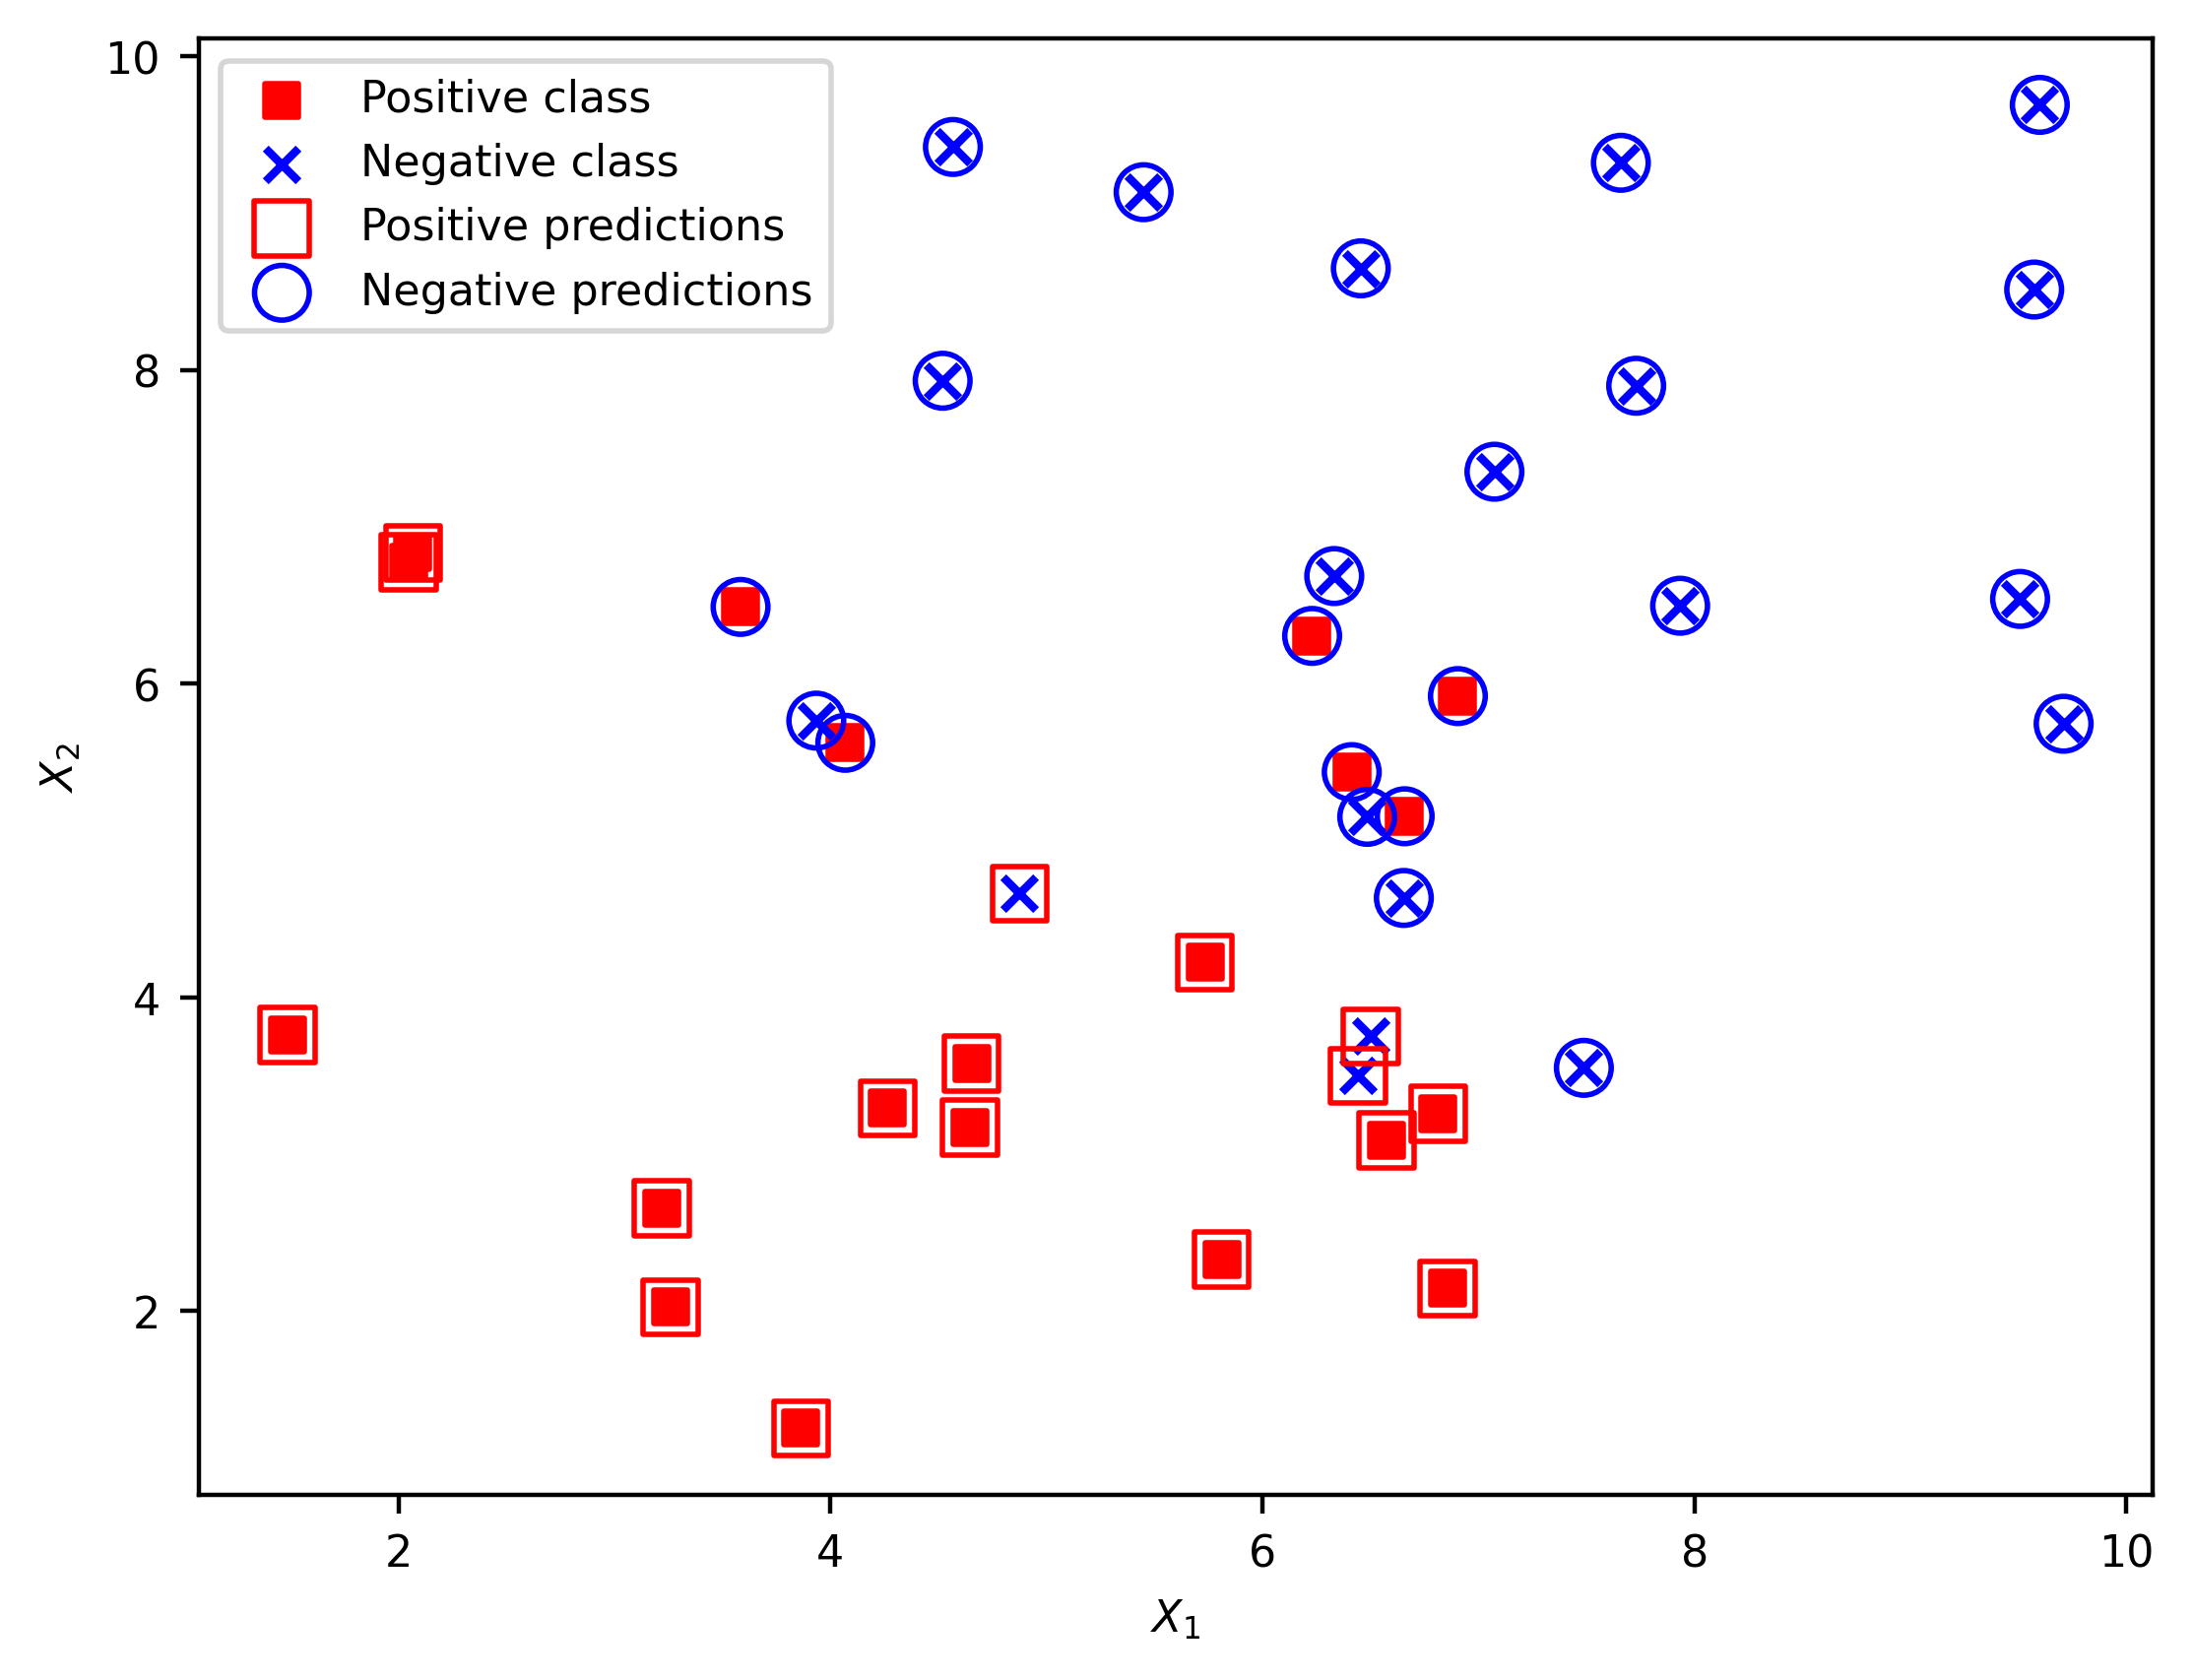

In [242]:
mpl.rcParams['font.size'] = 8
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], 
            s=100, marker='s', edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], 
            s=100, marker='o', edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class',
            'Positive predictions', 'Negative predictions'])

In [243]:
# decision boundary of logistic regression in two dimensions
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.16472042583006552 -0.2567518594997951


In [244]:
theta_0 = example_lr.intercept_

In [245]:
X_1_decision_boundary = np.array([0, 10])       # range of x-values on our plot
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2) # vectorized

In [248]:
X_2_decision_boundary

array([8.22863469, 1.81308521])

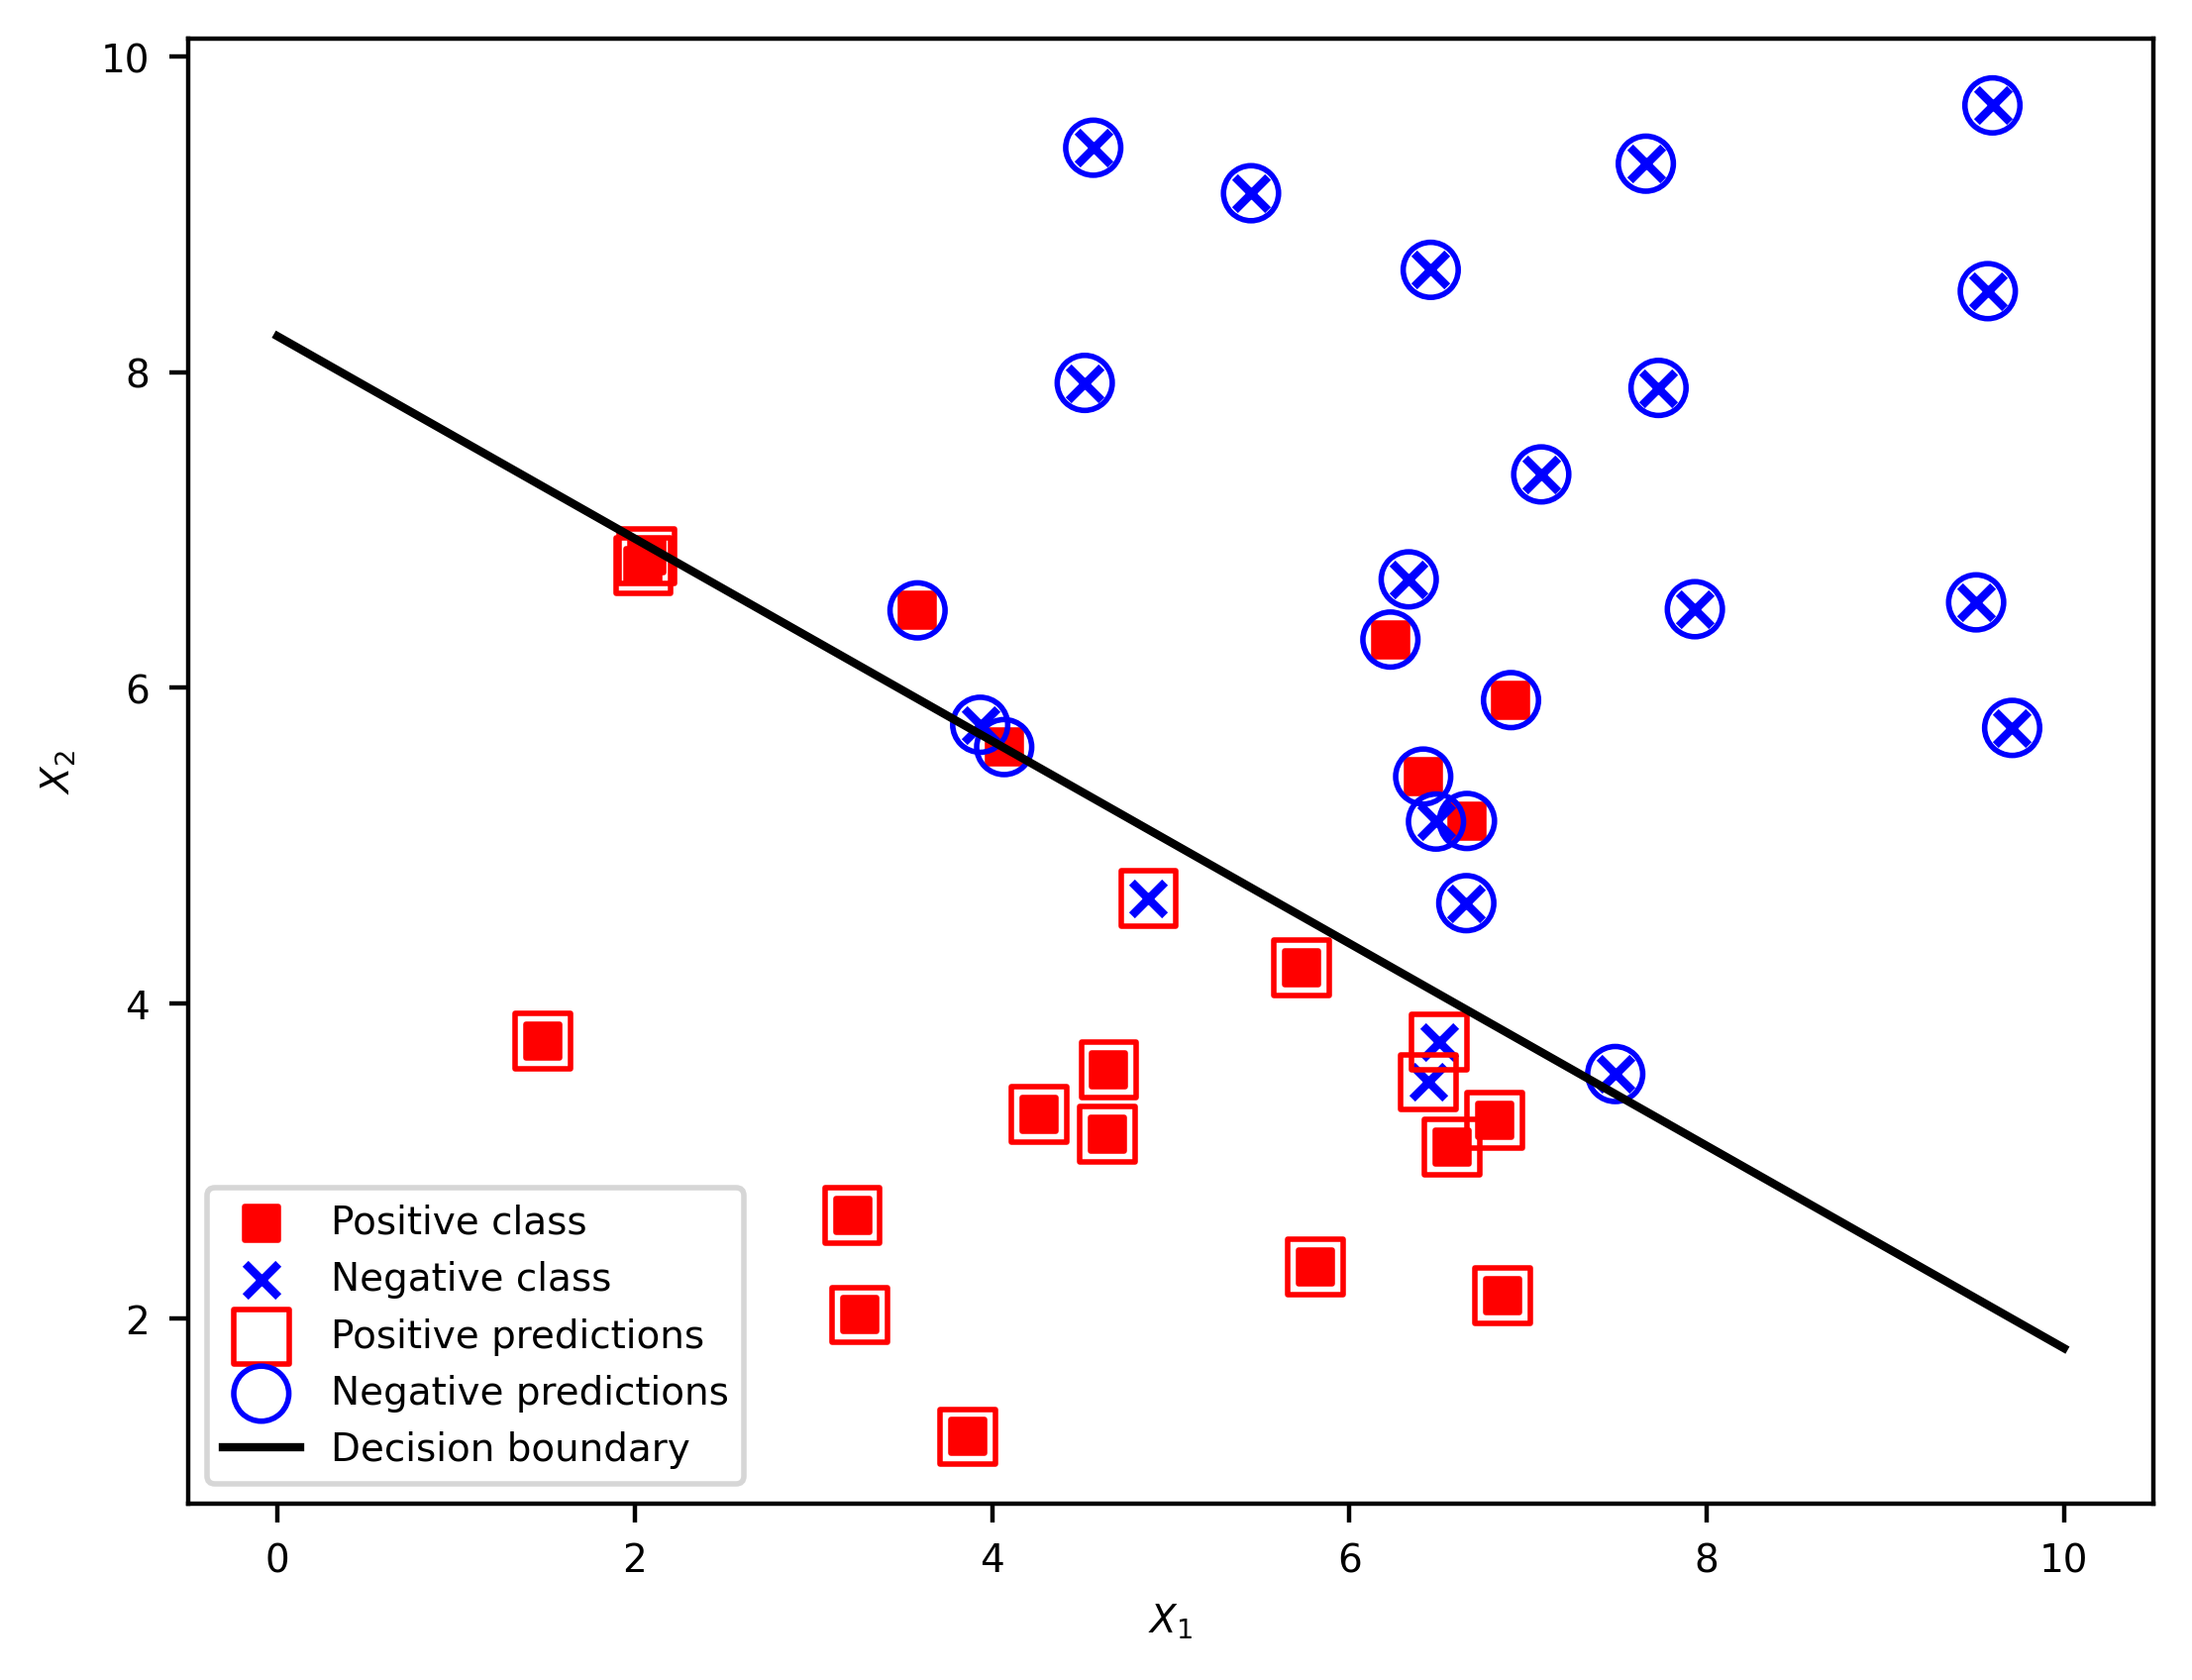

In [251]:
mpl.rcParams['font.size'] = 7
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], 
            s=100, marker='s', edgecolors='red', facecolors='none')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], 
            s=100, marker='o', edgecolors='blue', facecolors='none')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class',
            'Positive predictions', 'Negative predictions',
            'Decision boundary'])